# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [23]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [28]:
# Try loading one file

df = pd.read_parquet(r"C:\Users\Admin\Downloads\Data and Dictonary\trip_records\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [34]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [35]:
# from google.colab import drive
# drive.mount('/content/drive')

In [36]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
data = (r"C:\Users\Admin\OneDrive\Desktop\Data and Dictonary\trip_records")
# Create a list of all the twelve files to read
file_list = os.listdir(data)

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(data, file_name)

        # Reading the current file
        fresh_data = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        fresh_data['tpep_pickup_datetime'] = pd.to_datetime(fresh_data['tpep_pickup_datetime'])
        fresh_data['pickup_date'] = fresh_data['tpep_pickup_datetime'].dt.date
        fresh_data['pickup_hour'] = fresh_data['tpep_pickup_datetime'].dt.hour
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in fresh_data['pickup_date'].unique():
            date_df = fresh_data[fresh_data['pickup_date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_df = date_df[date_df['pickup_hour'] == hour]

                # Sample 5% of the hourly data randomly
                if not hour_df.empty:
                    sample = hour_df.sample(frac = 0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        print(f"processed and sampled{file_name}")
        
# we initialised this empty DF earlier
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

processed and sampled2023-1.parquet
processed and sampled2023-10.parquet
processed and sampled2023-11.parquet
processed and sampled2023-12.parquet
processed and sampled2023-2.parquet
processed and sampled2023-3.parquet
processed and sampled2023-4.parquet
processed and sampled2023-5.parquet
processed and sampled2023-6.parquet
processed and sampled2023-7.parquet
processed and sampled2023-8.parquet
processed and sampled2023-9.parquet
Error reading file New_Data_Files: 'tpep_pickup_datetime'


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [38]:
# Store the df in csv/parquet
New_Data_Files = (r"C:\Users\Admin\OneDrive\Desktop\Data and Dictonary\trip_records.parquet")
df.to_parquet(New_Data_Files, index=False)
print(f"Saved Parquet file to: {New_Data_Files}")

Saved Parquet file to: C:\Users\Admin\OneDrive\Desktop\Data and Dictonary\trip_records.parquet


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [41]:
# Load the new data file
test_df = pd.read_parquet(New_Data_Files)

In [42]:
test_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042850 entries, 0 to 2042849
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [46]:
# Fix the index and drop any columns that are not needed
test_df.reset_index(drop=True, inplace=True)
test_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [47]:
columns_to_drop = ['pickup_date', 'pickup_hour']
test_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [50]:
# Combine the two airport fee columns
test_df.rename(columns={'airport_fee': 'combined_airport_fee'}, inplace=True)
test_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         41.15                   0.0   
1                    1.0         15.48                   2.5   
2                    1.0         16.40                   2.5   
3                    1.0         11.50                   2.5   
4                    1.0         35.57                   NaN   

   combined_airport_fee  Airport_fee  
0                  1.25          NaN  
1                  0.00          NaN  
2                  0.00          NaN  
3                  0.00          NaN  
4                   NaN          NaN

In [51]:
# check where values of fare amount are negative
negative_fare_amounts = test_df[test_df['fare_amount'] < 0]
if not negative_fare_amounts.empty:
    print("Negative fare amounts found:")
    print(negative_fare_amounts)
else:
    print("No negative fare amounts found.")

No negative fare amounts found.


Did you notice something different in the `RatecodeID` column for above records?

In [53]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = test_df[test_df['fare_amount'] < 0]

ratecode_analysis = negative_fares['RatecodeID'].value_counts()

print("Negative Fare Counts by RatecodeID:")
print(ratecode_analysis)

fare_stats = negative_fares.groupby('RatecodeID')['fare_amount'].describe()
print("\nNegative Fare Statistics by RatecodeID:")
print(fare_stats)

Negative Fare Counts by RatecodeID:
Series([], Name: count, dtype: int64)

Negative Fare Statistics by RatecodeID:
Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


In [54]:
# Find which columns have negative values
negative_columns = [col for col in df.select_dtypes(include='number').columns 
                    if (df[col] < 0).any()]

print("Columns with negative values:", negative_columns)

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


In [55]:
# fix these negative values
numeric_cols = test_df.select_dtypes(include='number').columns
df[numeric_cols] = test_df[numeric_cols].clip(lower=0)

# Save cleaned file (optional)
test_df.to_parquet("cleaned_file.parquet", index=False)

print("Negative values replaced with 0 in numeric columns.")

Negative values replaced with 0 in numeric columns.


In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042850 entries, 0 to 2042849
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  combined_airport_fee  

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [59]:
# Find the proportion of missing values in each column
missing_proportion = test_df.isnull().mean()

# Sort in descending order and show top rows
missing_proportion.sort_values(ascending=False).head()

combined_airport_fee    0.925343
Airport_fee             0.109043
passenger_count         0.034386
congestion_surcharge    0.034386
RatecodeID              0.034386
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [61]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
null_rows = test_df[test_df.isna().any(axis=1)]
print(f"Rows with null values: {len(null_rows)}")
display(null_rows)  # works in Jupyter Notebook

# Impute NaN values in 'passenger_count' with median (or mean)
if 'passenger_count' in test_df.columns:
    median_passengers = test_df['passenger_count'].median()
    test_df['passenger_count'] = test_df['passenger_count'].fillna(median_passengers)
    print(f"Missing 'passenger_count' values filled with median = {median_passengers}")
else:
    print("'passenger_count' column not found.")

Rows with null values: 2042850


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
2042845         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
2042846         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
2042847         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
2042848         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
2042849         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74         1.0                  N           138   
1                 1.24         1.0                  N           161   
2                 1.44         1.0                  N           237   
3                 0.54         1.0                  N           143   
4                19.24         NaN               None            66   
...                ...         ...                ...           ...   
2042845           0.79         1.0                  N           231   
2042846           0.50         1.0                  N           158   
2042847           1.09         1.0                  N           161   
2042848          13.20         1.0                  N           164   
2042849           2.97         1.0                  N           231   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 256             2        32.40    6.0      0.5        0.00   
1                 237             1         7.90    1.0      0.5        2.58   
2                 141             2        11.40    1.0      0.5        0.00   
3                 142             2         6.50    1.0      0.5        0.00   
4                 107             0        25.64    0.0      0.5        5.93   
...               ...           ...          ...    ...      ...         ...   
2042845           231             1         8.60    1.0      0.5        2.00   
2042846            68             1         5.80    3.5      0.5        2.15   
2042847           162             1         9.30    1.0      0.5        2.86   
2042848            14             2        54.80    3.5      0.5        0.00   
2042849            68             1        17.00    1.0      0.5        4.40   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         41.15   
1                 0.0                    1.0         15.48   
2                 0.0                    1.0         16.40   
3                 0.0                    1.0         11.50   
4                 0.0                    1.0         35.57   
...               ...                    ...           ...   
2042845           0.0                    1.0         15.60   
2042846           0.0                    1.0         12.95   
2042847           0.0                    1.0         17.16   
2042848           0.0                    1.0         59.80   
2042849           0.0                    1.0         26.40   

         congestion_surcharge  combined_airport_fee  Airport_fee  
0                         0.0                  1.25          NaN  
1                         2.5                  0.00          NaN  
2                         2.5                  0.00          NaN  
3                         2.5                  0.00          NaN  
4                         NaN                   NaN          NaN  
...                       ...                   ...          ...  
2042845 

Missing 'passenger_count' values filled with median = 1.0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [64]:
# Fix missing values in 'RatecodeID'
if 'RatecodeID' in test_df.columns:
    most_common_ratecode = test_df['RatecodeID'].mode()[0]
    test_df['RatecodeID'] = test_df['RatecodeID'].fillna(most_common_ratecode)
    
    print(f"Missing 'RatecodeID' values filled with mode = {most_common_ratecode}")
else:
    print("'RatecodeID' column not found.")

print(test_df['RatecodeID'].value_counts(dropna=False))

Missing 'RatecodeID' values filled with mode = 1.0
RatecodeID
1.0     1931826
2.0       78448
5.0       11322
99.0      10692
3.0        6225
4.0        4334
6.0           3
Name: count, dtype: int64


In [65]:
test_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         41.15                   0.0   
1                    1.0         15.48                   2.5   
2                    1.0         16.40                   2.5   
3                    1.0         11.50                   2.5   
4                    1.0         35.57                   NaN   

   combined_airport_fee  Airport_fee  
0                  1.25          NaN  
1                  0.00          NaN  
2                  0.00          NaN  
3                  0.00          NaN  
4                   NaN          NaN

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [67]:
# handle null values in congestion_surcharge
if 'congestion_surcharge' in test_df.columns:
    # Fill NaNs with 0 (common for surcharge columns)
    test_df['congestion_surcharge'] = test_df['congestion_surcharge'].fillna(0)
    
    print(f"Missing 'congestion_surcharge' values filled with 0.")
else:
    print("'congestion_surcharge' column not found.")

Missing 'congestion_surcharge' values filled with 0.


In [68]:
test_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         41.15                   0.0   
1                    1.0         15.48                   2.5   
2                    1.0         16.40                   2.5   
3                    1.0         11.50                   2.5   
4                    1.0         35.57                   0.0   

   combined_airport_fee  Airport_fee  
0                  1.25          NaN  
1                  0.00          NaN  
2                  0.00          NaN  
3                  0.00          NaN  
4                   NaN          NaN

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [70]:
# Handle any remaining missing values
numeric_cols = test_df.select_dtypes(include='number').columns
categorical_cols = test_df.select_dtypes(exclude='number').columns

# Fill numeric NaNs with median
test_df[numeric_cols] = test_df[numeric_cols].fillna(test_df[numeric_cols].median())

# Fill categorical NaNs with mode (most frequent value)
for col in categorical_cols:
    if test_df[col].isna().any():
        mode_value = test_df[col].mode()[0]
        test_df[col] = test_df[col].fillna(mode_value)

print("All remaining missing values have been imputed.")


All remaining missing values have been imputed.


In [71]:
test_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0                  N            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         41.15                   0.0   
1                    1.0         15.48                   2.5   
2                    1.0         16.40                   2.5   
3                    1.0         11.50                   2.5   
4                    1.0         35.57                   0.0   

   combined_airport_fee  Airport_fee  
0                  1.25          0.0  
1                  0.00          0.0  
2                  0.00          0.0  
3                  0.00          0.0  
4                  0.00          0.0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

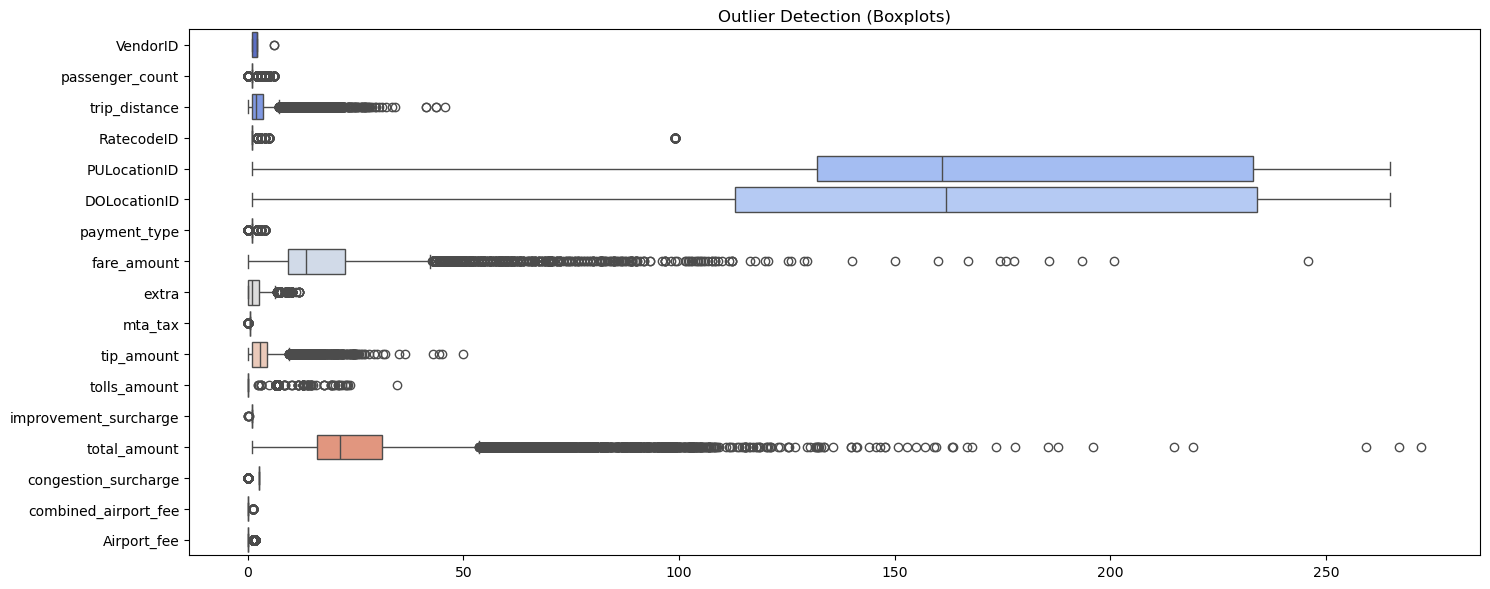

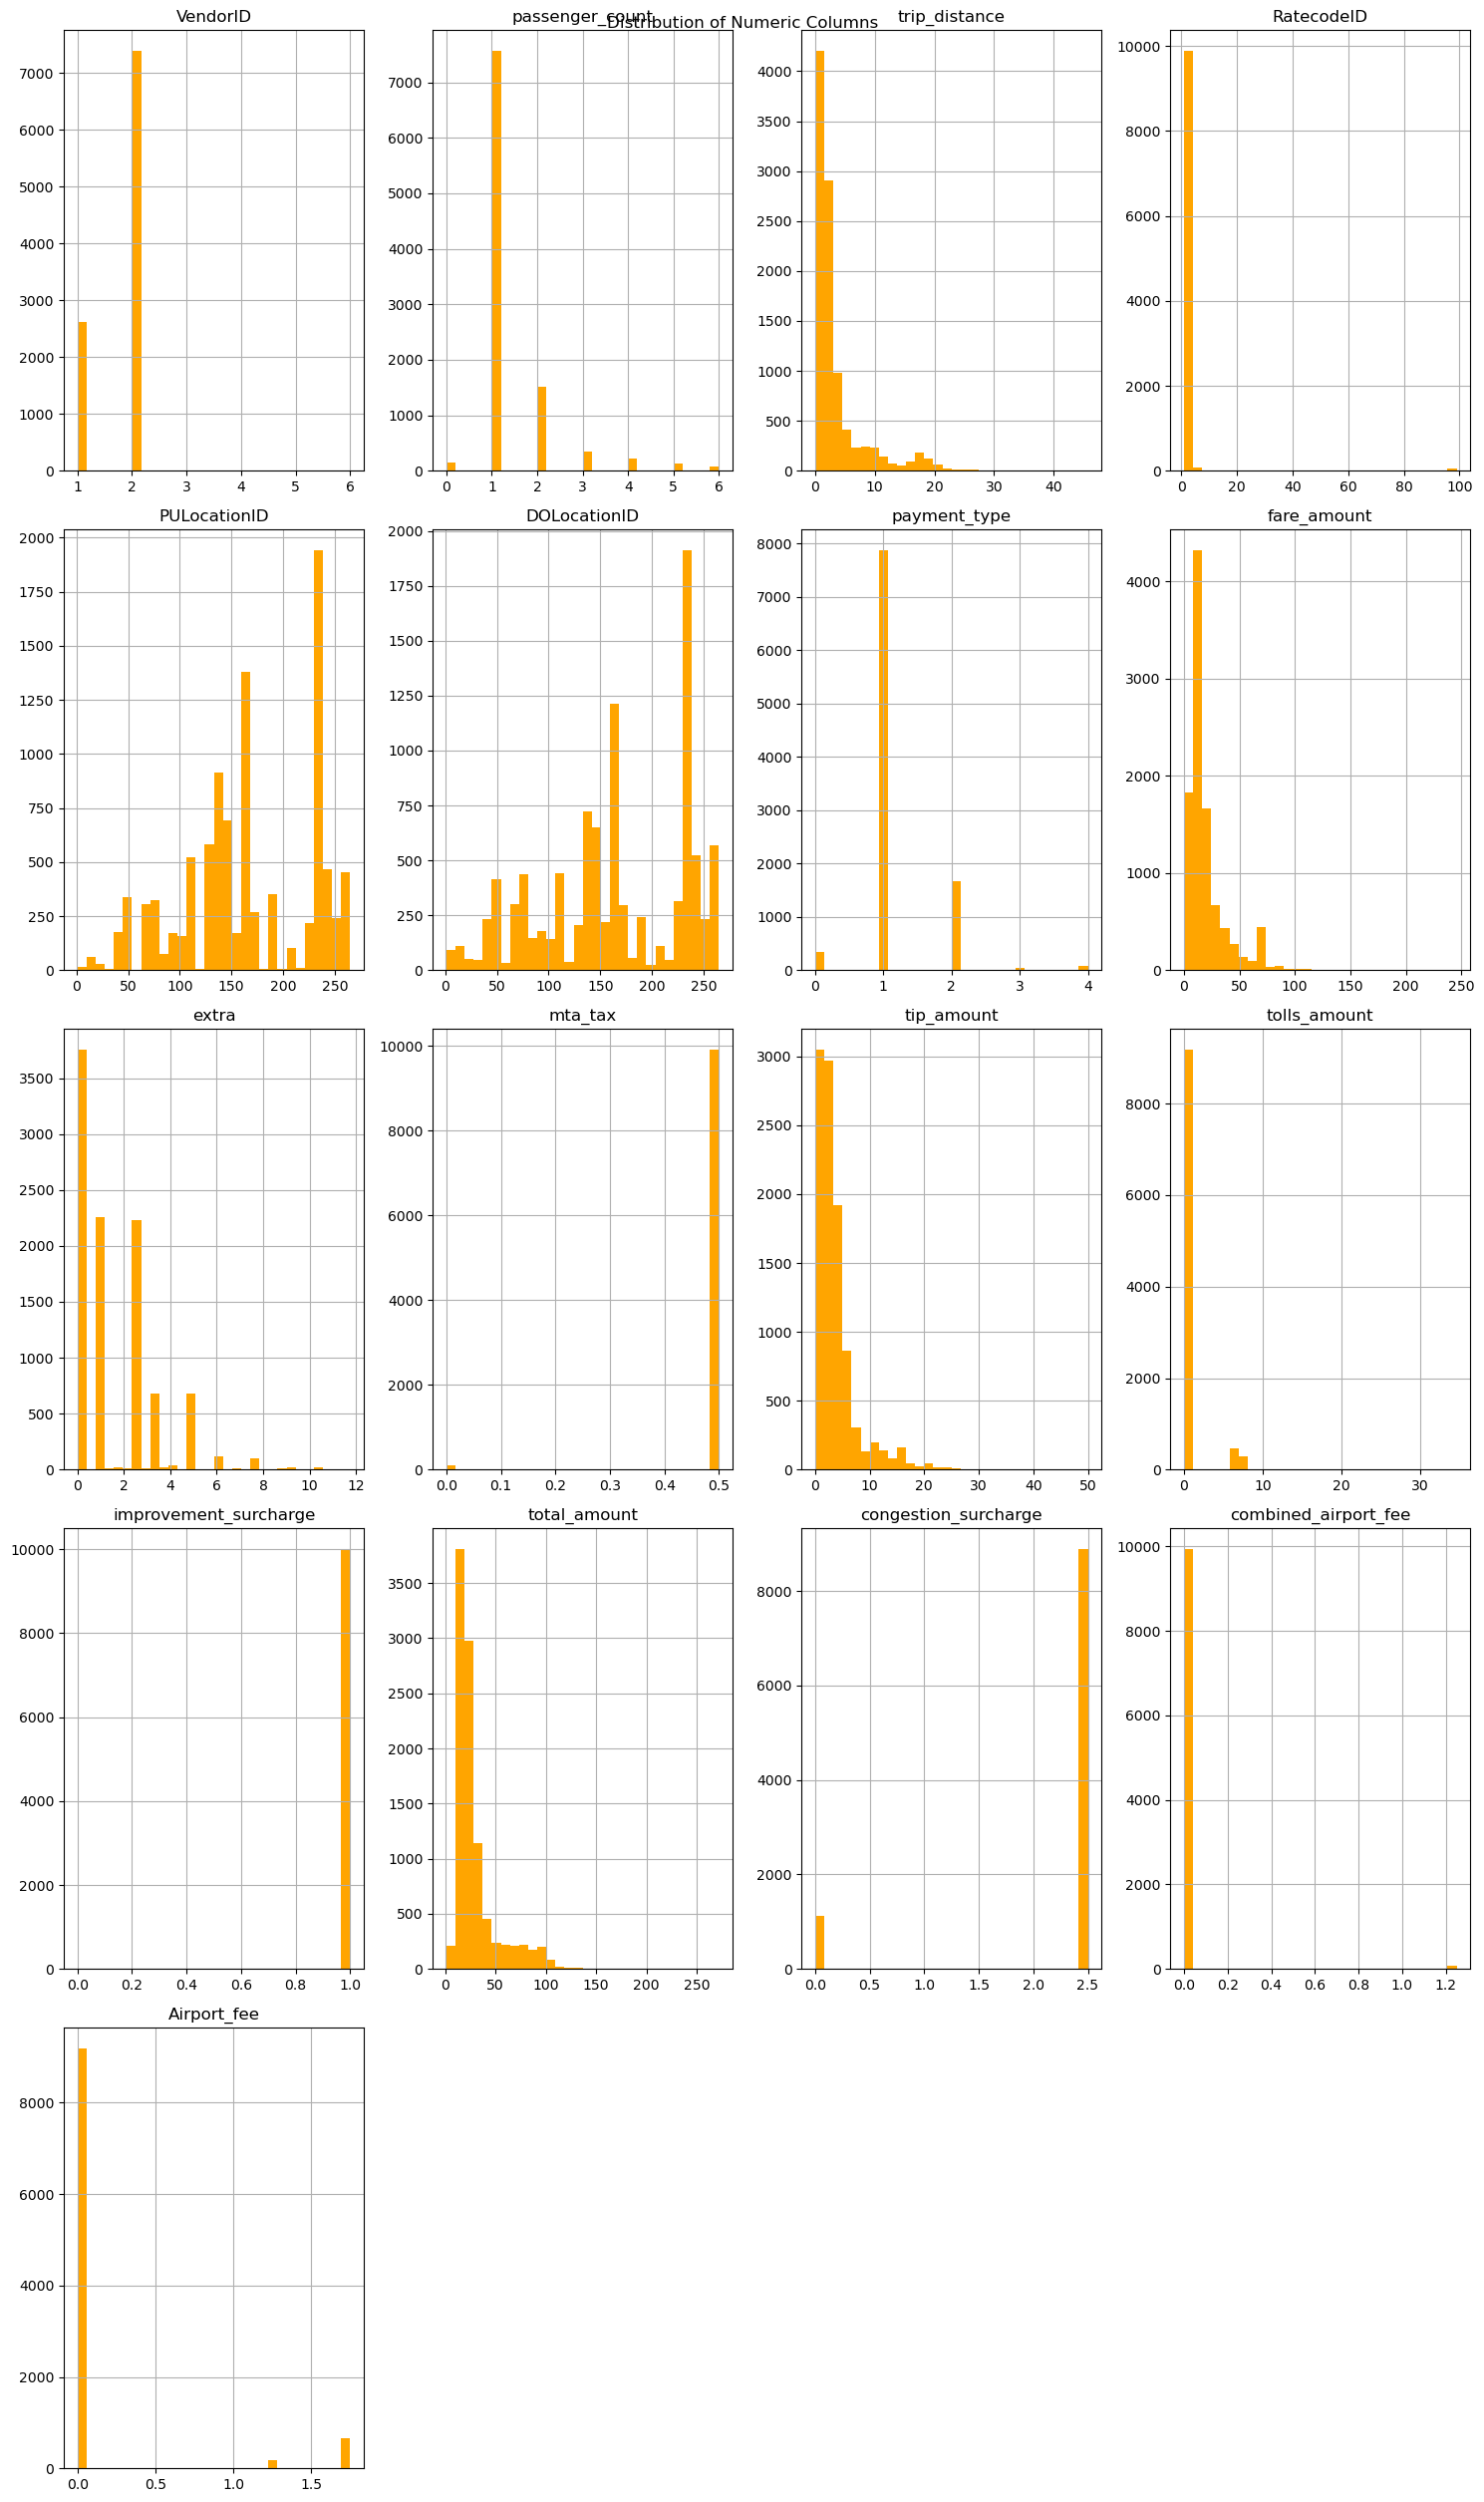

In [74]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
numeric_cols = test_df.select_dtypes(include='number').columns
valid_numeric_cols = [col for col in numeric_cols if test_df[col].dropna().nunique() > 1]

# Sample for speed
sample_df = test_df.sample(n=min(10000, len(test_df)), random_state=42)

# Combined boxplot for all numeric columns
plt.figure(figsize=(15, 6))
sns.boxplot(data=sample_df[valid_numeric_cols], orient="h", palette="coolwarm")
plt.title('Outlier Detection (Boxplots)')
plt.tight_layout()
plt.show()

# Combined histograms
sample_df[valid_numeric_cols].hist(bins=30, figsize=(15, len(valid_numeric_cols) * 1.5), color="orange")
plt.suptitle('Distribution of Numeric Columns')
plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [78]:
# remove passenger_count > 6
df = test_df.copy()


df = df[df['passenger_count'] <= 6]
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

df = df[~((df['trip_distance'] == 0) &
          (df['fare_amount'] == 0) &
          (df['PULocationID'] != df['DOLocationID']))]

df = df[df['trip_distance'] <= 250]

df.loc[df['payment_type'] == 0, 'payment_type'] = pd.NA

print(f"Cleaned data shape: {df.shape}")

Cleaned data shape: (2042685, 20)


Final cleaned data shape: (2040784, 20)


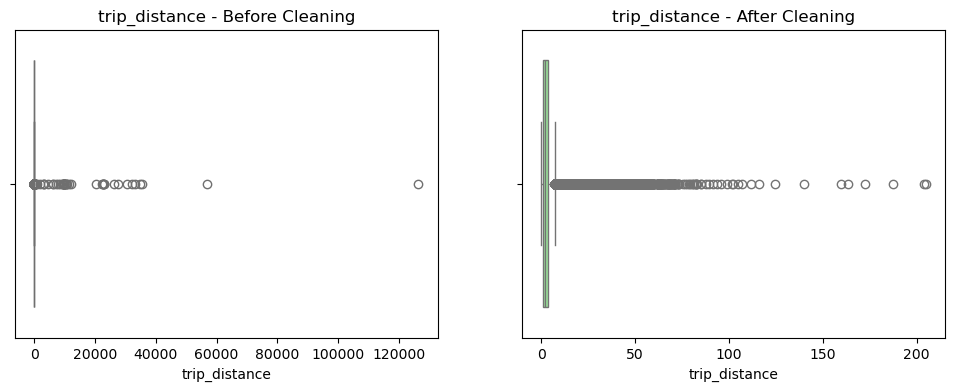

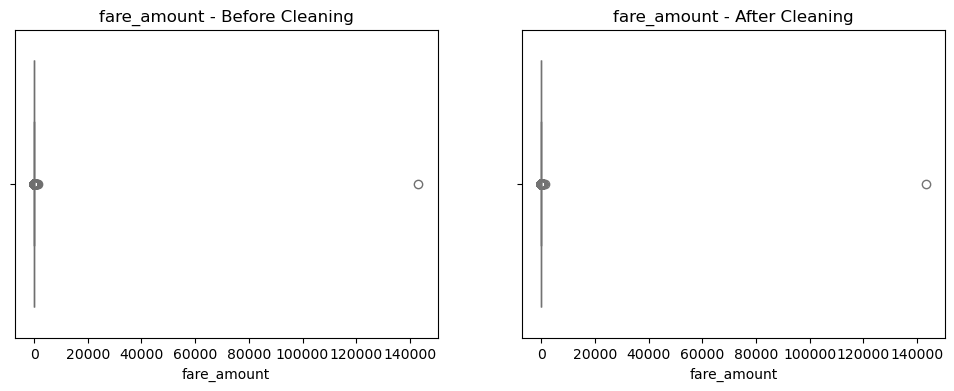

In [79]:
# Continue with outlier handling
# Start with the already cleaned df from previous step

# 6️⃣ Remove negative fares (except if representing refunds, which is unlikely here)
df = df[df['fare_amount'] >= 0]

# 7️⃣ Remove negative trip_distance values (sensor/GPS errors)
df = df[df['trip_distance'] >= 0]

# 8️⃣ Remove trips with unrealistic speeds
# Assuming pickup/dropoff datetime columns exist
if {'tpep_pickup_datetime', 'tpep_dropoff_datetime'}.issubset(df.columns):
    df['trip_duration_hrs'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600
    df['speed_mph'] = df['trip_distance'] / df['trip_duration_hrs']
    
    # Drop trips with extremely high speeds (> 80 mph — unrealistic for city taxi)
    df = df[(df['speed_mph'] >= 0) & (df['speed_mph'] <= 80)]
    
    # Drop helper columns
    df.drop(columns=['trip_duration_hrs', 'speed_mph'], inplace=True)

# 9️⃣ Remove total_amount values < 0 (shouldn't be possible unless refund)
if 'total_amount' in df.columns:
    df = df[df['total_amount'] >= 0]

print(f"Final cleaned data shape: {df.shape}")

# Optional: Before vs After outlier visualization for trip_distance and fare_amount
numeric_cols_to_plot = ['trip_distance', 'fare_amount']

for col in numeric_cols_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(x=test_df[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} - Before Cleaning')
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{col} - After Cleaning')
    plt.show()

In [80]:
# Do any columns need standardising?
def check_column_standardisation(data):
    issues = []

    for col in data.columns:
        col_data = data[col]
        col_dtype = col_data.dtype

        # Check passenger_count
        if col == 'passenger_count':
            if not np.issubdtype(col_dtype, np.integer):
                issues.append((col, "Should be integer type"))
            if col_data.min() < 1 or col_data.max() > 6:
                issues.append((col, f"Contains values outside valid range (1–6): min={col_data.min()}, max={col_data.max()}"))

        # Check trip_distance
        elif col == 'trip_distance':
            if col_data.min() < 0:
                issues.append((col, f"Contains negative distances: min={col_data.min()}"))
            if col_data.max() > 250:
                issues.append((col, f"Contains extremely large distances: max={col_data.max()}"))

        # Check fare_amount / total_amount
        elif col in ['fare_amount', 'total_amount']:
            if col_data.min() < 0:
                issues.append((col, f"Contains negative values: min={col_data.min()}"))

        # Check payment_type
        elif col == 'payment_type':
            unique_vals = set(col_data.dropna().unique())
            allowed_vals = {1, 2, 3, 4, 5, 6}  # Example allowed payment types
            invalid_vals = unique_vals - allowed_vals
            if invalid_vals:
                issues.append((col, f"Contains undefined payment_type values: {invalid_vals}"))

        # Check datetime columns
        elif 'datetime' in col.lower():
            if not np.issubdtype(col_dtype, np.datetime64):
                issues.append((col, "Should be converted to datetime type"))

        # Check Location IDs
        elif 'locationid' in col.lower():
            if not np.issubdtype(col_dtype, np.integer):
                issues.append((col, "Should be integer type"))
    
    return pd.DataFrame(issues, columns=["Column", "Issue"])

# Run the check
standardisation_issues = check_column_standardisation(df)
print(standardisation_issues if not standardisation_issues.empty else "No standardisation issues found ✅")


            Column                                              Issue
0  passenger_count                             Should be integer type
1  passenger_count  Contains values outside valid range (1–6): min...


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [82]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'combined_airport_fee',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

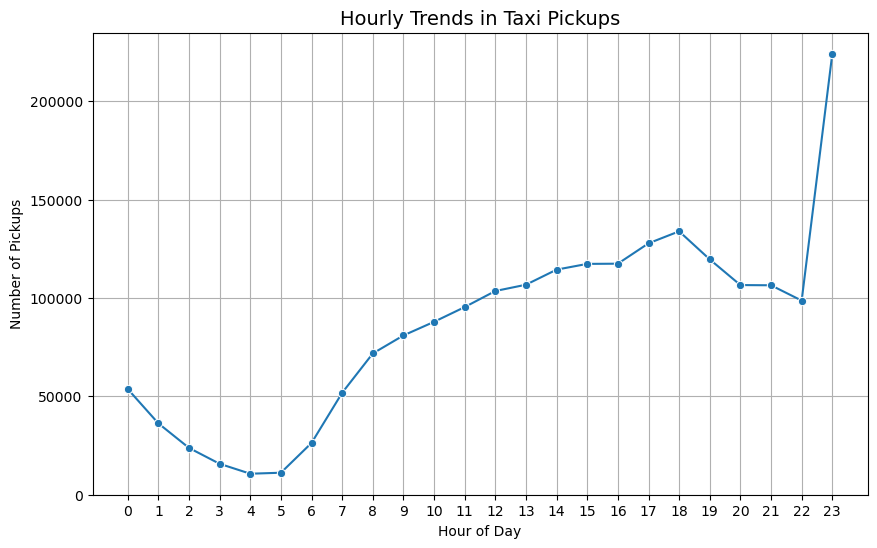

In [87]:
# Find and show the hourly trends in taxi pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract hour from pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by hour and count pickups
hourly_trends = df.groupby('pickup_hour').size().reset_index(name='pickup_count')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trends, x='pickup_hour', y='pickup_count', marker='o')
plt.xticks(range(0, 24))
plt.title('Hourly Trends in Taxi Pickups', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

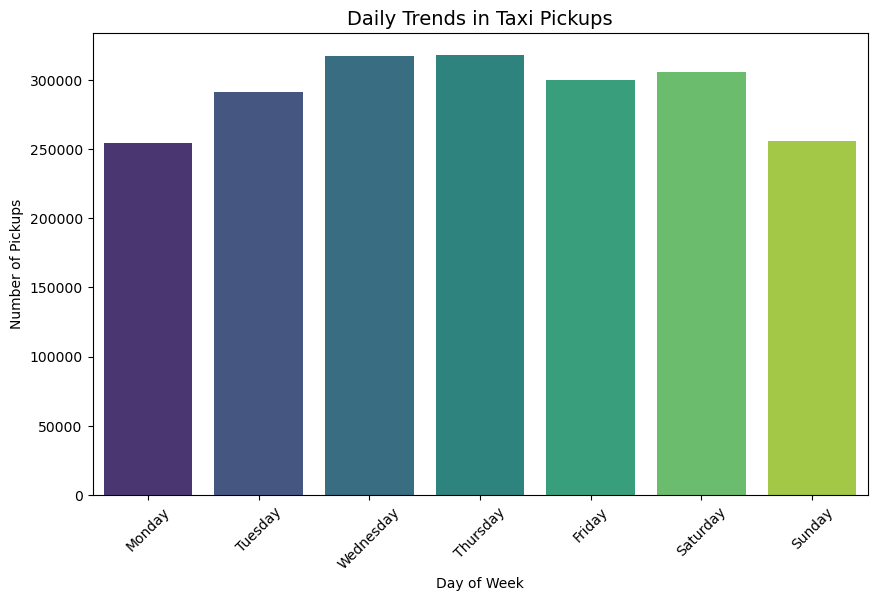

In [88]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract day of week (0=Monday, 6=Sunday)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

# Map numbers to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name'] = df['pickup_day'].map(day_names)

# Group by day and count pickups
daily_trends = df.groupby('pickup_day_name').size().reset_index(name='pickup_count')

# Sort by actual weekday order
daily_trends['pickup_day_name'] = pd.Categorical(
    daily_trends['pickup_day_name'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)
daily_trends = daily_trends.sort_values('pickup_day_name')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_trends, x='pickup_day_name', y='pickup_count', palette='viridis')
plt.title('Daily Trends in Taxi Pickups', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

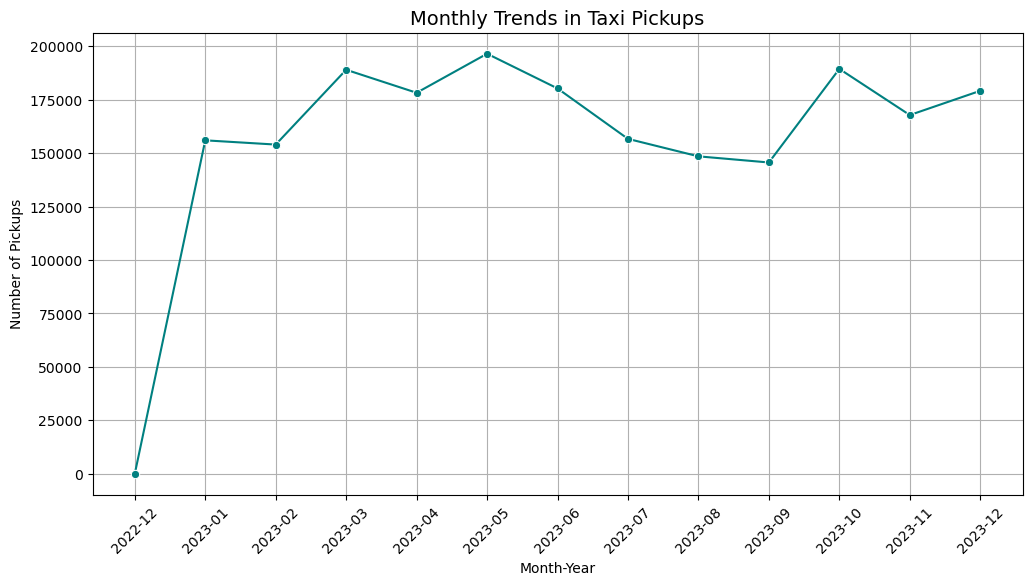

In [89]:
# Show the monthly trends in pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract month and year
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year

# Create a month-year label
df['month_year'] = df['tpep_pickup_datetime'].dt.to_period('M').astype(str)

# Group by month-year and count pickups
monthly_trends = df.groupby('month_year').size().reset_index(name='pickup_count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='month_year', y='pickup_count', marker='o', color='teal')
plt.xticks(rotation=45)
plt.title('Monthly Trends in Taxi Pickups', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [92]:
# Analyse the above parameters
params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

analysis_results = []

for col in params:
    if col in df.columns:
        total_rows = len(df)
        zero_count = (df[col] == 0).sum()
        neg_count = (df[col] < 0).sum()
        zero_pct = (zero_count / total_rows) * 100
        neg_pct = (neg_count / total_rows) * 100

        analysis_results.append({
            'Column': col,
            'Zero Count': zero_count,
            'Zero %': round(zero_pct, 2),
            'Negative Count': neg_count,
            'Negative %': round(neg_pct, 2)
        })

import pandas as pd
analysis_df = pd.DataFrame(analysis_results)

print("Analysis of Zero & Negative Values:")
print(analysis_df)

Analysis of Zero & Negative Values:
          Column  Zero Count  Zero %  Negative Count  Negative %
0    fare_amount         511    0.03               0         0.0
1     tip_amount      466120   22.84               0         0.0
2   total_amount         262    0.01               0         0.0
3  trip_distance       40034    1.96               0         0.0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?
yes

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [95]:
# Create a df with non zero entries for the selected parameters.
cols_financial = ['fare_amount', 'tip_amount', 'total_amount']

# Step 1: Remove rows where any financial parameter is zero
df_non_zero = df[~(df[cols_financial] == 0).any(axis=1)].copy()

# Step 2: For trip_distance, only drop zero if zones differ
if {'PULocationID', 'DOLocationID'}.issubset(df_non_zero.columns):
    df_non_zero = df_non_zero[~(
        (df_non_zero['trip_distance'] == 0) &
        (df_non_zero['PULocationID'] != df_non_zero['DOLocationID'])
    )]

print(f"Original shape: {df.shape}")
print(f"Filtered shape (non-zero in financials, valid zero distances kept): {df_non_zero.shape}")

Original shape: (2040784, 26)
Filtered shape (non-zero in financials, valid zero distances kept): (1570763, 26)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

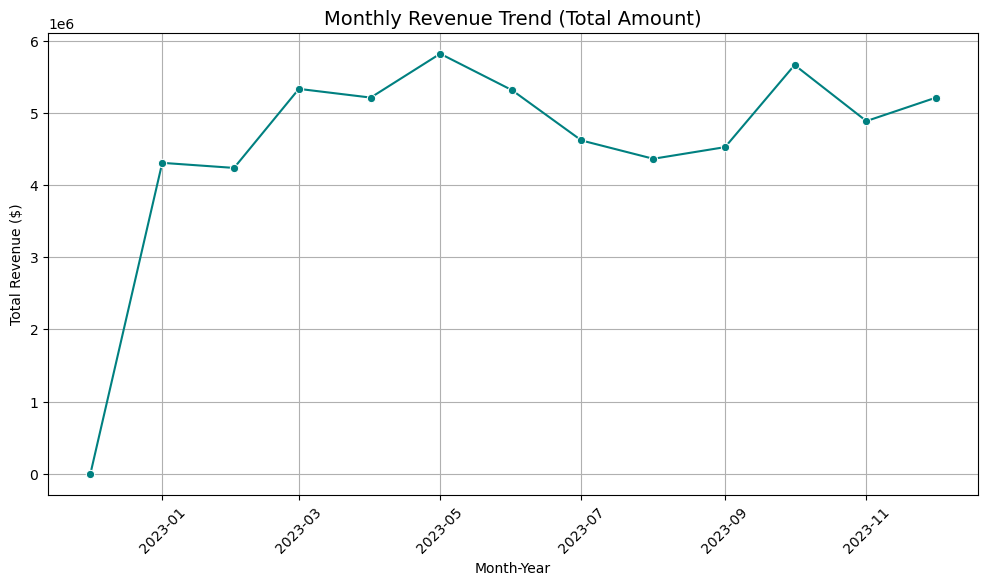

month_year  total_amount
0  2022-12-01        243.00
1  2023-01-01    4306792.83
2  2023-02-01    4236475.12
3  2023-03-01    5331197.94
4  2023-04-01    5210785.57
5  2023-05-01    5818435.07
6  2023-06-01    5313809.43
7  2023-07-01    4616929.70
8  2023-08-01    4363178.98
9  2023-09-01    4524603.96
10 2023-10-01    5661920.08
11 2023-11-01    4885428.75
12 2023-12-01    5210057.09

In [97]:
# Group data by month and analyse monthly revenue
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract year-month
df['month_year'] = df['tpep_pickup_datetime'].dt.to_period('M').astype(str)

# Group by month-year and sum total_amount for revenue
monthly_revenue = df.groupby('month_year')['total_amount'].sum().reset_index()

# Sort chronologically
monthly_revenue['month_year'] = pd.to_datetime(monthly_revenue['month_year'])
monthly_revenue = monthly_revenue.sort_values('month_year')

# Plot monthly revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month_year', y='total_amount', marker='o', color='teal')
plt.title('Monthly Revenue Trend (Total Amount)', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Optional: Display the data table
monthly_revenue


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  total_amount  proportion
0  2022Q4        243.00    0.000409
1  2023Q1   13874465.89   23.326327
2  2023Q2   16343030.07   27.476579
3  2023Q3   13504712.64   22.704682
4  2023Q4   15757405.92   26.492003


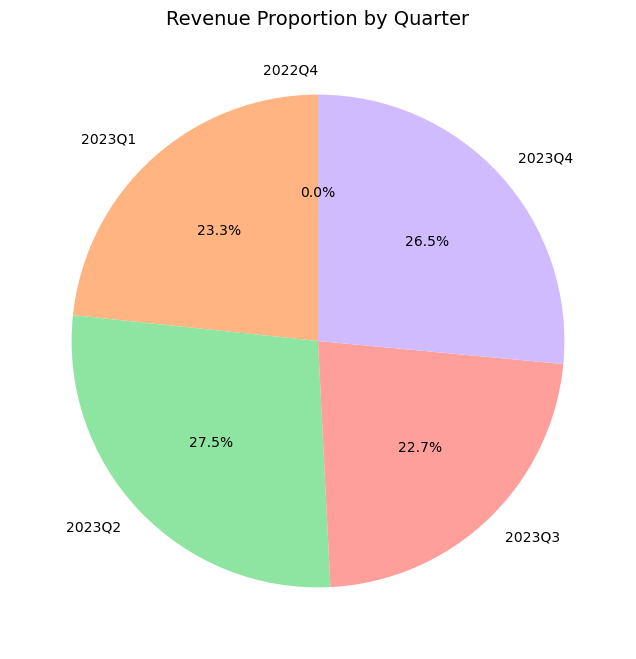

In [99]:
# Calculate proportion of each quarter
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract quarter and year
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q').astype(str)

# Group by quarter and sum total_amount
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportion
total_rev = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / total_rev) * 100

# Display table
print(quarterly_revenue)

# Plot pie chart for proportions
plt.figure(figsize=(8, 8))
plt.pie(
    quarterly_revenue['total_amount'],
    labels=quarterly_revenue['quarter'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Revenue Proportion by Quarter', fontsize=14)
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

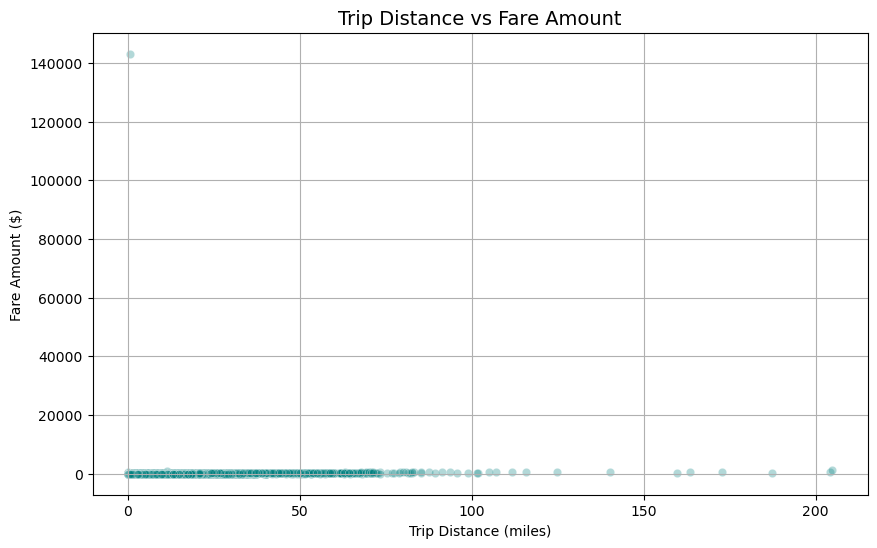

Correlation between trip_distance and fare_amount: 0.1645


In [101]:
# Show how trip fare is affected by distance
df_non_zero_dist = df[df['trip_distance'] > 0].copy()

# Scatter plot: trip_distance vs fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_non_zero_dist,
    x='trip_distance',
    y='fare_amount',
    alpha=0.3,
    color='teal'
)
plt.title('Trip Distance vs Fare Amount', fontsize=14)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df_non_zero_dist['trip_distance'].corr(df_non_zero_dist['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

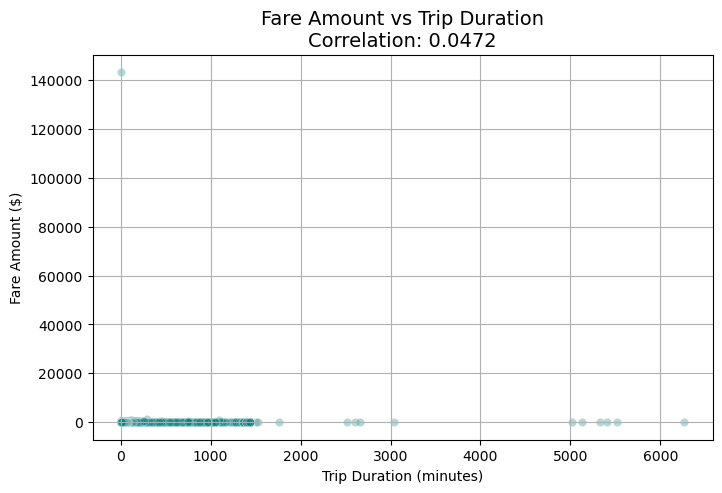

In [103]:
# Show relationship between fare and trip duration
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Exclude invalid durations
valid_df = df[df['trip_duration_min'] > 0]

# Calculate correlation
fare_duration_corr = valid_df['fare_amount'].corr(valid_df['trip_duration_min'])

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=valid_df,
    x='trip_duration_min',
    y='fare_amount',
    alpha=0.3,
    color='teal'
)
plt.title(f'Fare Amount vs Trip Duration\nCorrelation: {fare_duration_corr:.4f}', fontsize=14)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

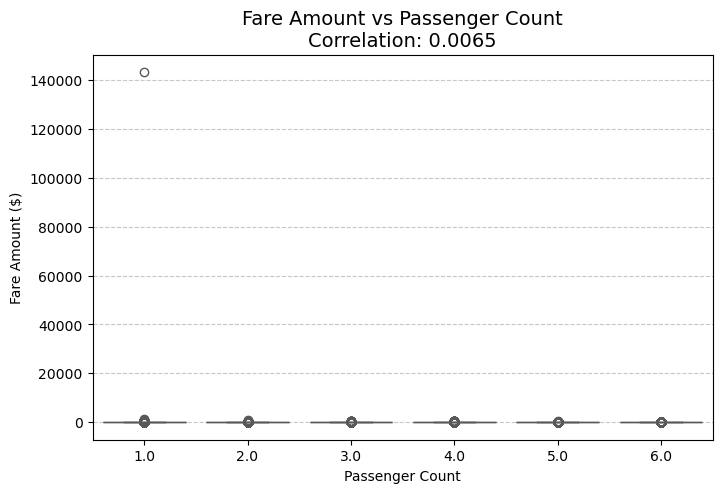

In [104]:
# Show relationship between fare and number of passengers
valid_passenger_df = df[df['passenger_count'] > 0]

# Calculate correlation
fare_passenger_corr = valid_passenger_df['fare_amount'].corr(valid_passenger_df['passenger_count'])

# Plot boxplot to show distribution of fares per passenger count
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=valid_passenger_df,
    x='passenger_count',
    y='fare_amount',
    palette='Set2'
)
plt.title(f'Fare Amount vs Passenger Count\nCorrelation: {fare_passenger_corr:.4f}', fontsize=14)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


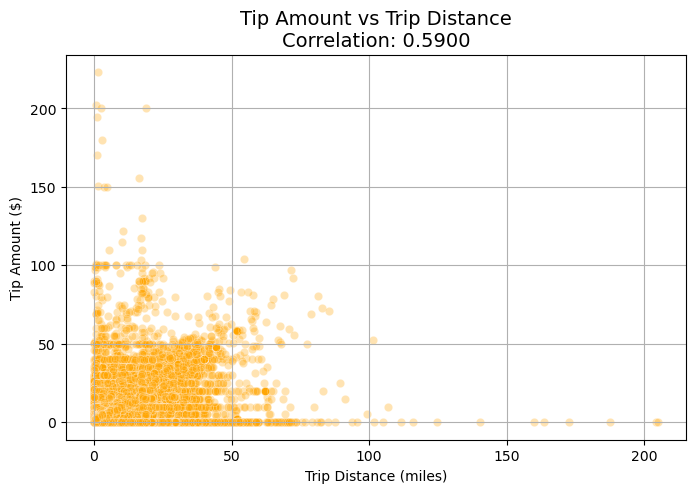

In [105]:
# Show relationship between tip and trip distance
valid_distance_df = df[df['trip_distance'] > 0]

# Calculate correlation
tip_distance_corr = valid_distance_df['tip_amount'].corr(valid_distance_df['trip_distance'])

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=valid_distance_df,
    x='trip_distance',
    y='tip_amount',
    alpha=0.3,
    color='orange'
)
plt.title(f'Tip Amount vs Trip Distance\nCorrelation: {tip_distance_corr:.4f}', fontsize=14)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

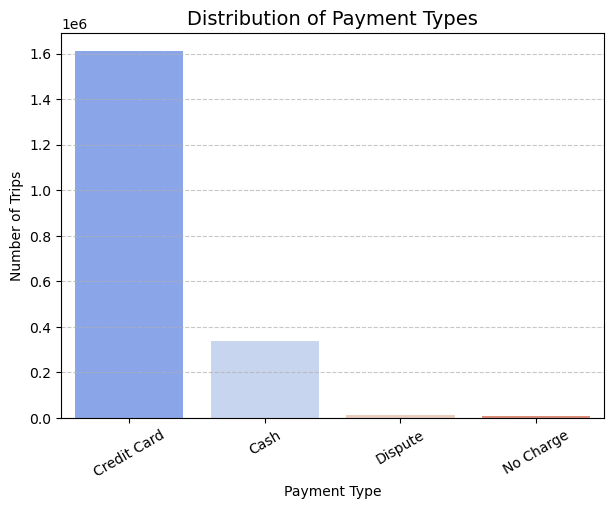

In [107]:
# Analyse the distribution of different payment types (payment_type).
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df['payment_type_label'] = df['payment_type'].map(payment_mapping)

# Re-plot with labels
plt.figure(figsize=(7, 5))
sns.countplot(
    data=df,
    x='payment_type_label',
    palette='coolwarm',
    order=df['payment_type_label'].value_counts().index
)
plt.title('Distribution of Payment Types', fontsize=14)
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [112]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [114]:
import geopandas as gpd

shapefile_path = (r"C:\Users\Admin\OneDrive\Desktop\Data and Dictonary\taxi_Zones\taxi_Zones.shp")
zones = gpd.read_file(shapefile_path)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

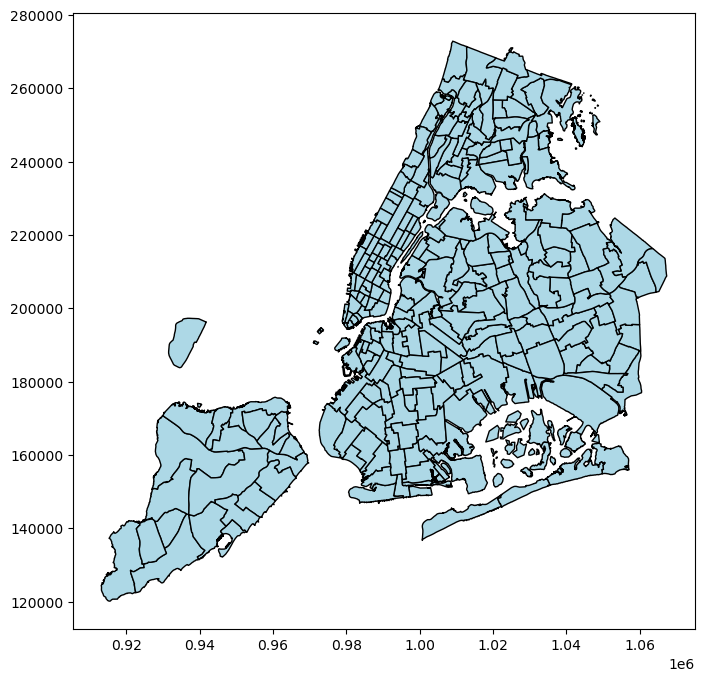

In [116]:
# Check GeoDataFrame info
print(zones.info())

# Plot the taxi zones
zones.plot(figsize=(12, 8), edgecolor="black", color="lightblue")

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [119]:
# Merge zones and trip records using locationID and PULocationID
trips_with_pickup_zone = test_df.merge(
    zones[['LocationID', 'zone', 'borough', 'geometry']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)

trips_with_pickup_zone.rename(
    columns={'zone': 'pickup_zone', 'borough': 'pickup_borough', 'geometry': 'pickup_geometry'},
    inplace=True
)

trips_with_pickup_zone.drop(columns=['LocationID'], inplace=True)

trips_with_pickup_zone.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0                  N            66           107   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             2  ...        0.00           0.0                    1.0   
1             1  ...        2.58           0.0                    1.0   
2             2  ...        0.00           0.0                    1.0   
3             2  ...        0.00           0.0                    1.0   
4             0  ...        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  combined_airport_fee  Airport_fee  \
0         41.15                   0.0                  1.25          0.0   
1         15.48                   2.5                  0.00          0.0   
2         16.40                   2.5                  0.00          0.0   
3         11.50                   2.5                  0.00          0.0   
4         35.57                   0.0                  0.00          0.0   

             pickup_zone  pickup_borough  \
0      LaGuardia Airport          Queens   
1         Midtown Center       Manhattan   
2  Upper East Side South       Manhattan   
3    Lincoln Square West       Manhattan   
4     DUMBO/Vinegar Hill        Brooklyn   

                                     pickup_geometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((990055.507 196472.349, 990004.46 196...  

[5 rows x 23 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [121]:
# Group data by location and calculate the number of trips
pickup_counts = test_df.groupby('PULocationID').size().reset_index(name='trip_count')

# Sort by trip count (optional)
pickup_counts = pickup_counts.sort_values(by='trip_count', ascending=False)

print(pickup_counts.head())

     PULocationID  trip_count
125           132      109855
154           161       93070
229           237       92171
228           236       81815
131           138       72175


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0       240.0  
1           2.0         2.0  
2           3.0        44.

<Axes: >

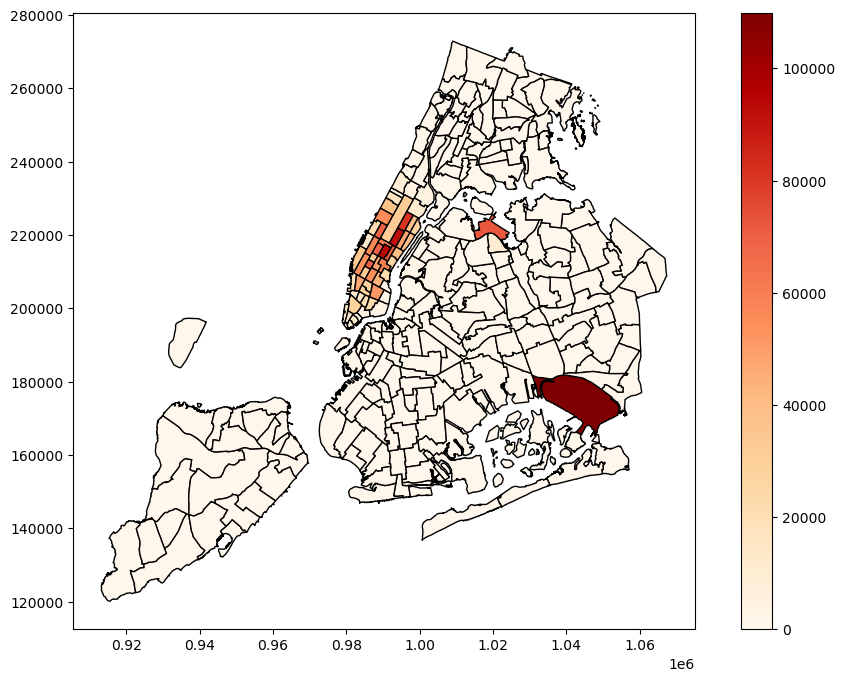

In [123]:
# Merge trip counts back to the zones GeoDataFrame
pickup_counts = test_df.groupby('PULocationID').size().reset_index(name='trip_count')

# Step 2: Merge trip counts back to zones GeoDataFrame
zones_with_counts = zones.merge(
    pickup_counts,
    how='left',
    left_on='LocationID',
    right_on='PULocationID'
)

# Step 3: Replace NaN trip counts with 0 (zones with no trips)
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0)

# Step 4: Preview
print(zones_with_counts.head())

# Step 5: Plot trips per zone
zones_with_counts.plot(
    column='trip_count',
    cmap='OrRd',
    legend=True,
    figsize=(12, 8),
    edgecolor='black'
)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

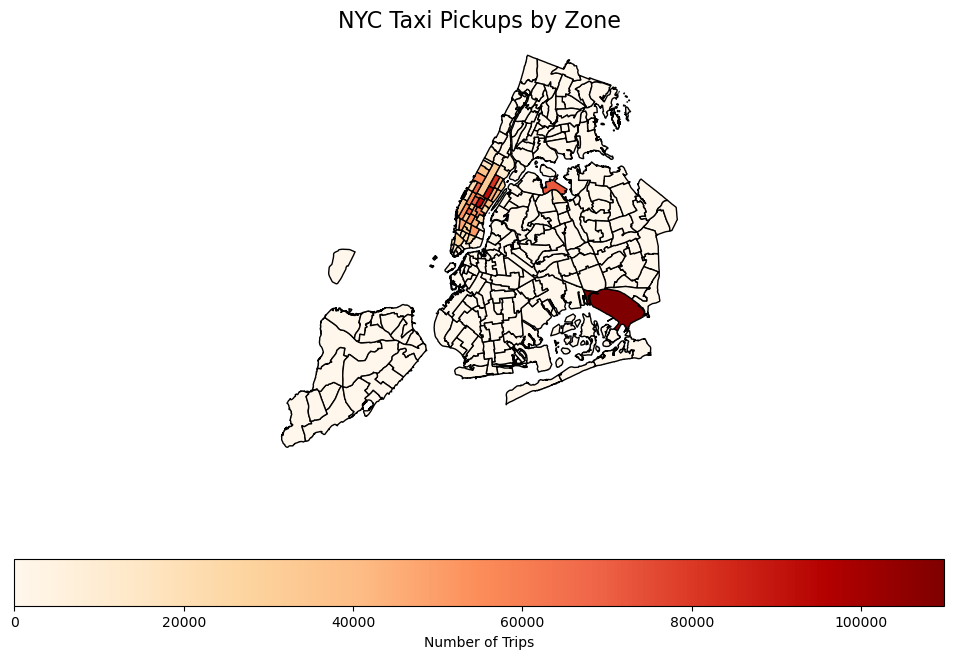

In [127]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Step 2: Plot GeoDataFrame on axis
zones_with_counts.plot(
    column='trip_count',              # Column to color by
    ax=ax,                             # Use the defined axis
    legend=True,                       # Show legend
    cmap='OrRd',                       # Color map
    edgecolor='black',                 # Zone borders
    legend_kwds={
        'label': "Number of Trips",    # Legend label
        'orientation': "horizontal"    # Legend orientation
    }
)

# Step 3: Add title
ax.set_title("NYC Taxi Pickups by Zone", fontsize=16)

# Step 4: Remove axis for clean map look
ax.set_axis_off()

# Step 5: Display plot
plt.show()

In [128]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones_with_counts.sort_values(by='trip_count', ascending=False)
zones_sorted.head(10)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
160       161    0.035804    0.000072                Midtown Center   
236       237    0.042213    0.000096         Upper East Side South   
235       236    0.044252    0.000103         Upper East Side North   
137       138    0.107467    0.000537             LaGuardia Airport   
161       162    0.035270    0.000048                  Midtown East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     PULocationID  trip_count  
131         132.0    109855.0  
160         161.0     93070.0  
236         237.0     92171.0  
235         236.0     81815.0  
137         138.0     72175.0  
161         162.0     70029.0  
185         186.0     69680.0  
229         230.0     68811.0  
141         142.0     68715.0  
169         170.0     59156.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [137]:
# Find routes which have the slowest speeds at different times of the day
trips_with_pickup_zone['tpep_pickup_datetime'] = pd.to_datetime(trips_with_pickup_zone['tpep_pickup_datetime'])
trips_with_pickup_zone['tpep_dropoff_datetime'] = pd.to_datetime(trips_with_pickup_zone['tpep_dropoff_datetime'])

# Calculate trip duration in hours
trips_with_pickup_zone['trip_duration_hours'] = (
    trips_with_pickup_zone['tpep_dropoff_datetime'] - trips_with_pickup_zone['tpep_pickup_datetime']
).dt.total_seconds() / 3600

# Calculate average speed in mph
trips_with_pickup_zone['avg_speed_mph'] = (
    trips_with_pickup_zone['trip_distance'] / trips_with_pickup_zone['trip_duration_hours']
)

# Extract pickup hour
trips_with_pickup_zone['pickup_hour'] = trips_with_pickup_zone['tpep_pickup_datetime'].dt.hour

# Group by pickup & dropoff zones with hour
slowest_routes = (
    trips_with_pickup_zone.groupby(['pickup_zone', 'DOLocationID', 'pickup_hour'])
    .agg(avg_speed=('avg_speed_mph', 'mean'), trip_count=('avg_speed_mph', 'count'))
    .reset_index()
)

# Filter out unrealistic data
slowest_routes = slowest_routes[(slowest_routes['avg_speed'] > 0) & (slowest_routes['trip_count'] >= 5)]

# Get slowest routes for each hour
slowest_per_hour = (
    slowest_routes.sort_values(['pickup_hour', 'avg_speed'])
    .groupby('pickup_hour')
    .head(5)
)

slowest_per_hour

pickup_zone  DOLocationID  pickup_hour  avg_speed  \
98357                     Seaport           209            0   1.553684   
111444    Two Bridges/Seward Park           232            0   2.330159   
103585                  Sunnyside           226            0   2.778003   
131930         World Trade Center           261            0   3.287578   
47960                   Hudson Sq           125            0   4.532511   
...                           ...           ...          ...        ...   
3221            Battery Park City           144           23   0.228649   
5533                  Boerum Hill            25           23   0.410127   
96048   Prospect-Lefferts Gardens           188           23   0.483871   
47982                   Hudson Sq           125           23   0.525906   
21012                East Chelsea           160           23   0.557005   

        trip_count  
98357            5  
111444           6  
103585           6  
131930           6  
47960            5  
...            ...  
3221            25  
5533            18  
96048           12  
47982           39  
21012           22  

[120 rows x 5 columns]

How does identifying high-traffic, high-demand routes help us?

- Identifying high-traffic, high-demand routes helps optimize driver deployment, reduce wait times, improve route planning, and maximize revenue by focusing resources where demand is highest.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 23 with 224297 trips


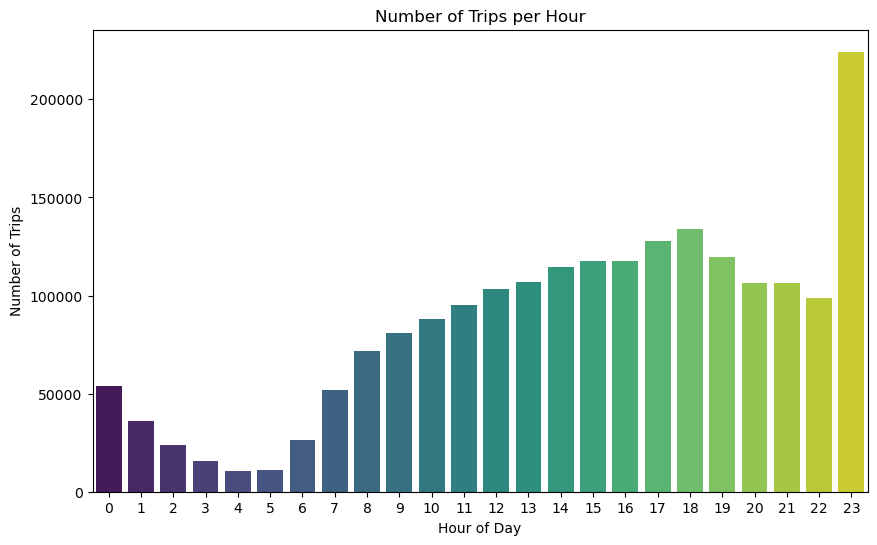

In [140]:
# Visualise the number of trips per hour and find the busiest hour
trips_with_pickup_zone['tpep_pickup_datetime'] = pd.to_datetime(trips_with_pickup_zone['tpep_pickup_datetime'])

# Extract the pickup hour
trips_with_pickup_zone['pickup_hour'] = trips_with_pickup_zone['tpep_pickup_datetime'].dt.hour

# Count trips per hour
trips_per_hour = trips_with_pickup_zone.groupby('pickup_hour').size().reset_index(name='trip_count')

# Find busiest hour
busiest_hour = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]

print(f"Busiest hour: {busiest_hour['pickup_hour']} with {busiest_hour['trip_count']} trips")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_hour', y='trip_count', data=trips_per_hour, palette='viridis')
plt.title("Number of Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [143]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1  # Replace with your actual sampling fraction

# Count trips per hour
trips_per_hour = trips_with_pickup_zone.groupby('pickup_hour').size().reset_index(name='trip_count')

# Get top 5 busiest hours
top5_hours = trips_per_hour.nlargest(5, 'trip_count').copy()

# Scale up to estimate actual trips
top5_hours['scaled_trip_count'] = (top5_hours['trip_count'] / sample_fraction).astype(int)

print("Top 5 busiest hours with scaled-up trip counts:")
print(top5_hours)

Top 5 busiest hours with scaled-up trip counts:
    pickup_hour  trip_count  scaled_trip_count
23           23      224297            2242970
18           18      133944            1339440
17           17      127873            1278730
19           19      119664            1196640
16           16      117525            1175250


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

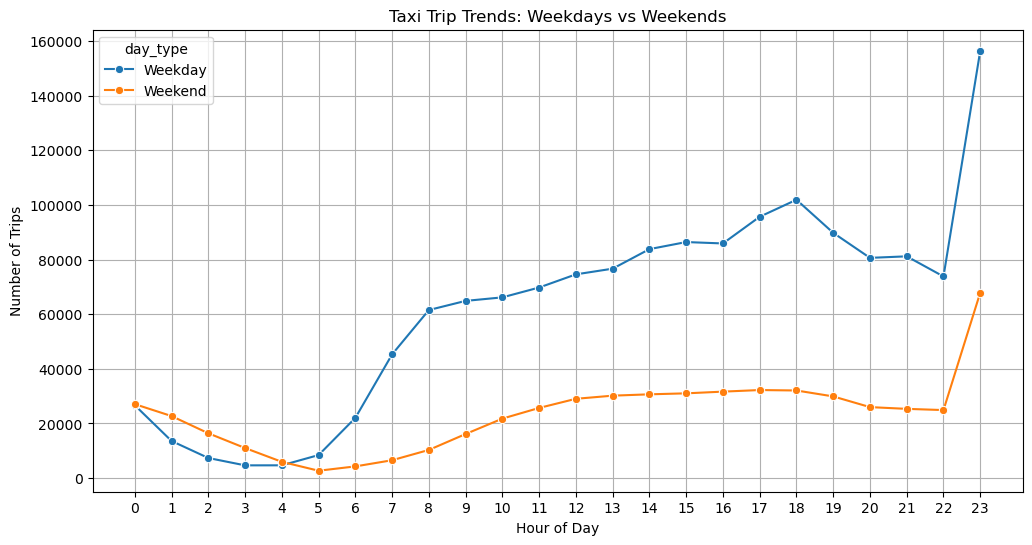

In [145]:
# Compare traffic trends for the week days and weekends
trips_with_pickup_zone['tpep_pickup_datetime'] = pd.to_datetime(trips_with_pickup_zone['tpep_pickup_datetime'])

# Extract day of week and hour
trips_with_pickup_zone['day_of_week'] = trips_with_pickup_zone['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
trips_with_pickup_zone['pickup_hour'] = trips_with_pickup_zone['tpep_pickup_datetime'].dt.hour

# Label weekday/weekend
trips_with_pickup_zone['day_type'] = trips_with_pickup_zone['day_of_week'].apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

# Group by day_type and hour
traffic_trends = trips_with_pickup_zone.groupby(['day_type', 'pickup_hour']).size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=traffic_trends,
    x='pickup_hour',
    y='trip_count',
    hue='day_type',
    marker='o'
)
plt.title("Taxi Trip Trends: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us
Busy and quiet hour patterns reveal when demand peaks and dips, helping in
Driver allocation – more taxis during peak hours, fewer during slow times.
Dynamic pricing – adjusting fares to match demand.
Traffic management – reducing congestion in high-demand periods.
Service planning – scheduling maintenance or driver breaks in quiet hours.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [148]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

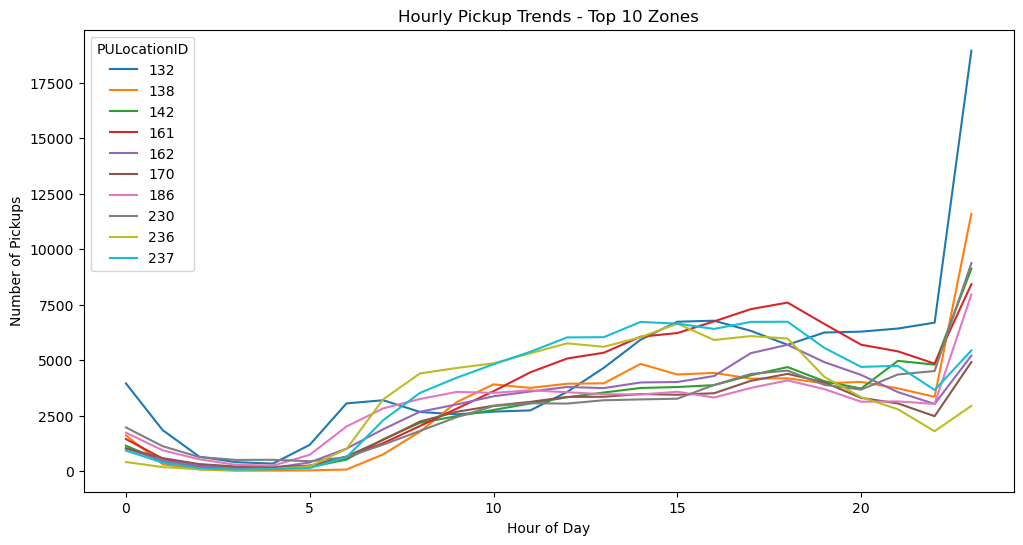

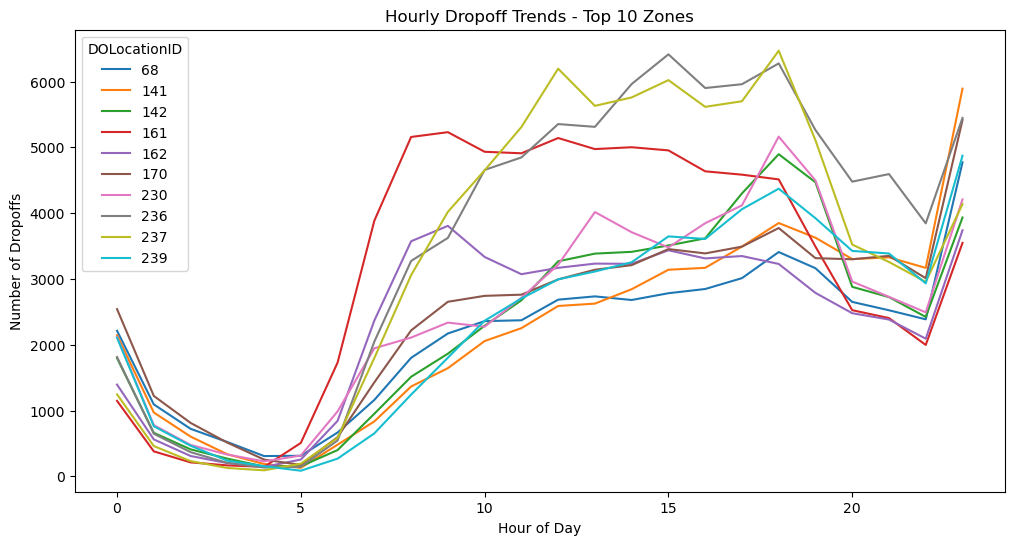

In [150]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
top_pickup_zones = (
    df['PULocationID']
    .value_counts()
    .head(10)
    .index
)

# Top 10 dropoff zones
top_dropoff_zones = (
    df['DOLocationID']
    .value_counts()
    .head(10)
    .index
)

# Filter for only these zones
pickup_df = df[df['PULocationID'].isin(top_pickup_zones)].copy()
dropoff_df = df[df['DOLocationID'].isin(top_dropoff_zones)].copy()

# Hourly pickup trends in top pickup zones
pickup_trends = (
    pickup_df.groupby([pickup_df['tpep_pickup_datetime'].dt.hour, 'PULocationID'])
    .size()
    .unstack(fill_value=0)
)

# Hourly dropoff trends in top dropoff zones
dropoff_trends = (
    dropoff_df.groupby([dropoff_df['tpep_dropoff_datetime'].dt.hour, 'DOLocationID'])
    .size()
    .unstack(fill_value=0)
)

# Plot pickup trends
pickup_trends.plot(figsize=(12,6))
plt.title("Hourly Pickup Trends - Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.legend(title="PULocationID")
plt.show()

# Plot dropoff trends
dropoff_trends.plot(figsize=(12,6))
plt.title("Hourly Dropoff Trends - Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Dropoffs")
plt.legend(title="DOLocationID")
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Nighttime Pickup Zones (LocationIDs):
Index([132, 79, 249, 48, 230, 138, 114, 148, 186, 142], dtype='int64', name='PULocationID')

Top 10 Nighttime Dropoff Zones (LocationIDs):
Index([79, 48, 170, 141, 107, 68, 263, 236, 239, 230], dtype='int64', name='DOLocationID')


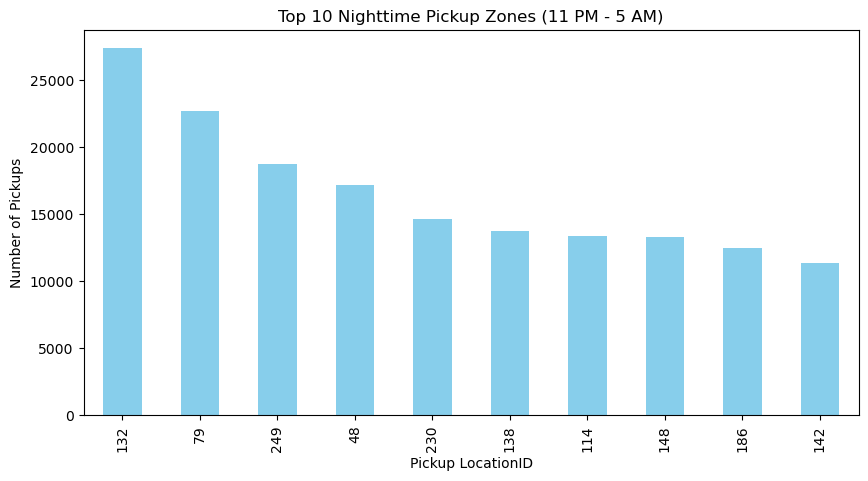

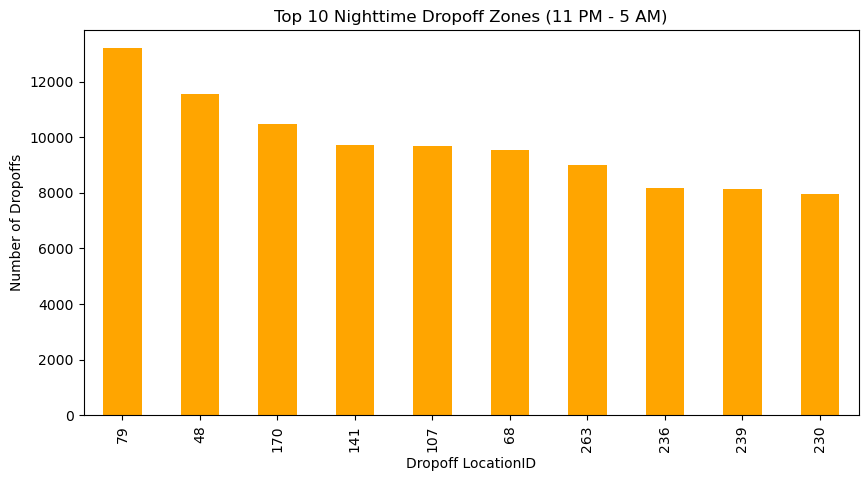

In [152]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = df[df['tpep_pickup_datetime'].dt.hour.isin([23, 0, 1, 2, 3, 4, 5])]

# Top 10 pickup zones at night
top_night_pickups = (
    night_df['PULocationID']
    .value_counts()
    .head(10)
    .index
)

# Top 10 dropoff zones at night
top_night_dropoffs = (
    night_df['DOLocationID']
    .value_counts()
    .head(10)
    .index
)

print("Top 10 Nighttime Pickup Zones (LocationIDs):")
print(top_night_pickups)

print("\nTop 10 Nighttime Dropoff Zones (LocationIDs):")
print(top_night_dropoffs)

# If you want to visualize
plt.figure(figsize=(10,5))
night_df['PULocationID'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Nighttime Pickup Zones (11 PM - 5 AM)")
plt.xlabel("Pickup LocationID")
plt.ylabel("Number of Pickups")
plt.show()

plt.figure(figsize=(10,5))
night_df['DOLocationID'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Nighttime Dropoff Zones (11 PM - 5 AM)")
plt.xlabel("Dropoff LocationID")
plt.ylabel("Number of Dropoffs")
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share (11 PM - 5 AM): 19.08%
Daytime Revenue Share (6 AM - 10 PM): 80.92%


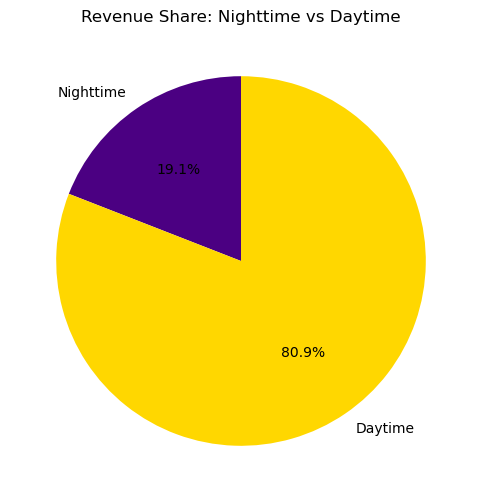

In [154]:
# Filter for night hours (11 PM to 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter for night and day trips
night_df = df[df['tpep_pickup_datetime'].dt.hour.isin(night_hours)]
day_df   = df[~df['tpep_pickup_datetime'].dt.hour.isin(night_hours)]

# Calculate total revenue for each
night_revenue = night_df['total_amount'].sum()
day_revenue   = day_df['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Calculate revenue share
night_share = (night_revenue / total_revenue) * 100
day_share   = (day_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_share:.2f}%")
print(f"Daytime Revenue Share (6 AM - 10 PM): {day_share:.2f}%")

# Optional: Visualize
plt.figure(figsize=(6,6))
plt.pie(
    [night_revenue, day_revenue],
    labels=['Nighttime', 'Daytime'],
    autopct='%1.1f%%',
    colors=['#4B0082', '#FFD700'],
    startangle=90
)
plt.title("Revenue Share: Nighttime vs Daytime")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  fare_per_mile_per_passenger
0              1.0                    11.045431
1              2.0                     6.422242
2              3.0                     4.027239
3              4.0                     4.146760
4              5.0                     1.657458
5              6.0                     1.333461


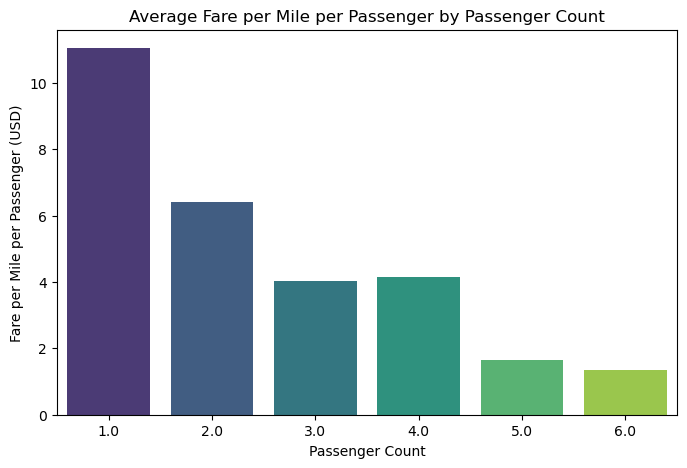

In [157]:
# Analyse the fare per mile per passenger for different passenger counts
valid_df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]

# Calculate fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Calculate fare per mile per passenger
valid_df['fare_per_mile_per_passenger'] = valid_df['fare_per_mile'] / valid_df['passenger_count']

# Group by passenger count and calculate average
avg_fare_per_passenger = (
    valid_df.groupby('passenger_count')['fare_per_mile_per_passenger']
    .mean()
    .reset_index()
    .sort_values('passenger_count')
)

print(avg_fare_per_passenger)

# Optional: Visualize
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_fare_per_passenger,
    x='passenger_count',
    y='fare_per_mile_per_passenger',
    palette='viridis'
)
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger (USD)')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

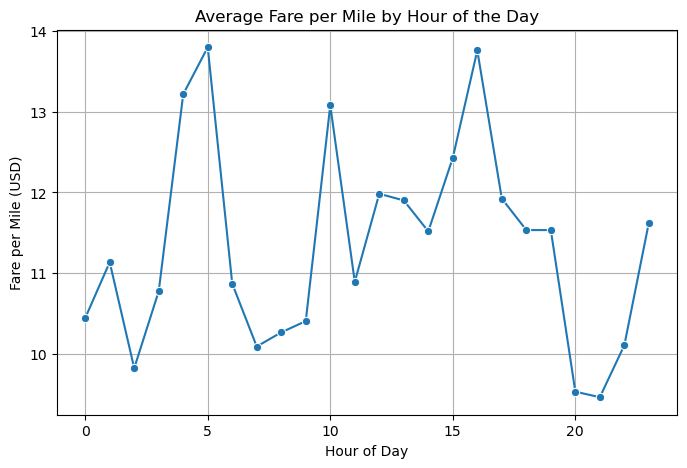

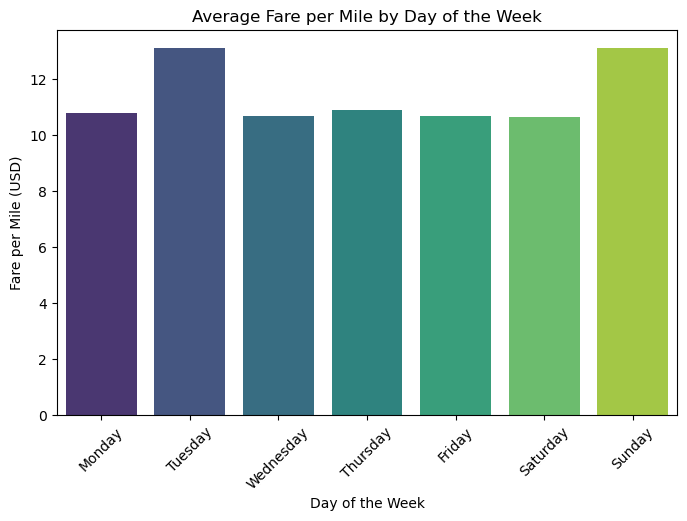

In [159]:
# Compare the average fare per mile for different days and for different times of the day
# Filter trips with positive distance
valid_df = df[df['trip_distance'] > 0].copy()

# Calculate fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Extract hour and day names
valid_df['hour'] = valid_df['tpep_pickup_datetime'].dt.hour
valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()

# 1️⃣ Average fare per mile by hour of the day
avg_fare_by_hour = (
    valid_df.groupby('hour')['fare_per_mile']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.lineplot(data=avg_fare_by_hour, x='hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.show()

# 2️⃣ Average fare per mile by day of the week
avg_fare_by_day = (
    valid_df.groupby('day_of_week')['fare_per_mile']
    .mean()
    .reset_index()
)

# Order days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_fare_by_day['day_of_week'] = pd.Categorical(avg_fare_by_day['day_of_week'], categories=day_order, ordered=True)
avg_fare_by_day = avg_fare_by_day.sort_values('day_of_week')

plt.figure(figsize=(8,5))
sns.barplot(data=avg_fare_by_day, x='day_of_week', y='fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fare per Mile (USD)')
plt.xticks(rotation=45)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

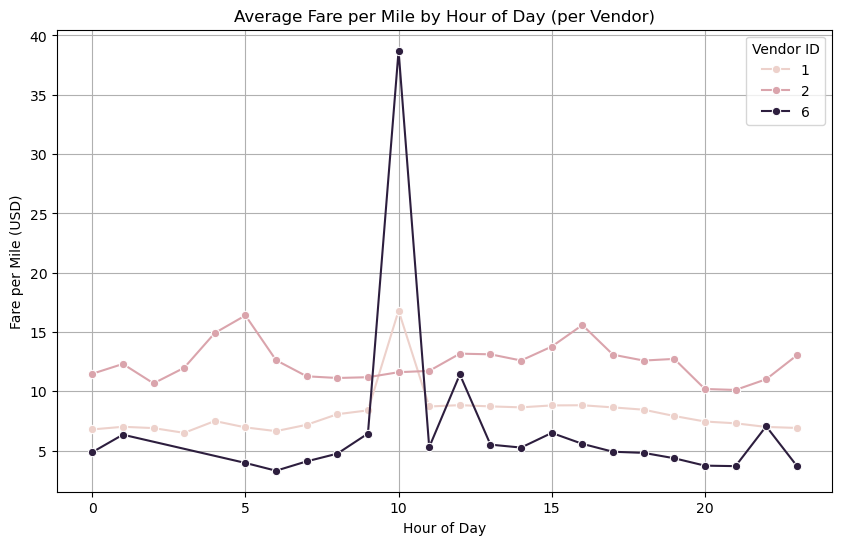

In [161]:
# Compare fare per mile for different vendors
valid_df = df[df['trip_distance'] > 0].copy()

# Calculate fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Extract hour of day
valid_df['hour'] = valid_df['tpep_pickup_datetime'].dt.hour

# Group by VendorID and hour
avg_fare_vendor_hour = (
    valid_df.groupby(['VendorID', 'hour'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_fare_vendor_hour, x='hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Hour of Day (per Vendor)')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.legend(title='Vendor ID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


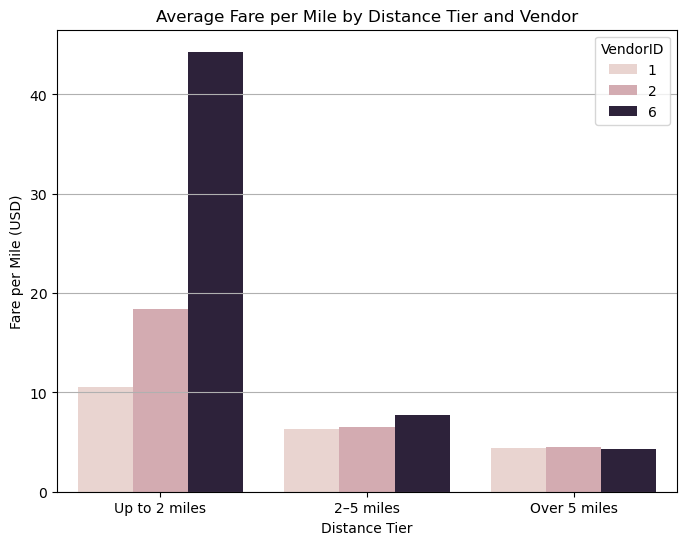

In [163]:
# Defining distance tiers
valid_df = df[df['trip_distance'] > 0].copy()

# Calculate fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Define distance tiers
def distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif distance <= 5:
        return '2–5 miles'
    else:
        return 'Over 5 miles'

valid_df['distance_tier'] = valid_df['trip_distance'].apply(distance_tier)

# Group by vendor and distance tier
avg_fare_tier_vendor = (
    valid_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Sort tiers for better plotting
tier_order = ['Up to 2 miles', '2–5 miles', 'Over 5 miles']
avg_fare_tier_vendor['distance_tier'] = pd.Categorical(avg_fare_tier_vendor['distance_tier'], categories=tier_order, ordered=True)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=avg_fare_tier_vendor, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile by Distance Tier and Vendor')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile (USD)')
plt.grid(axis='y')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

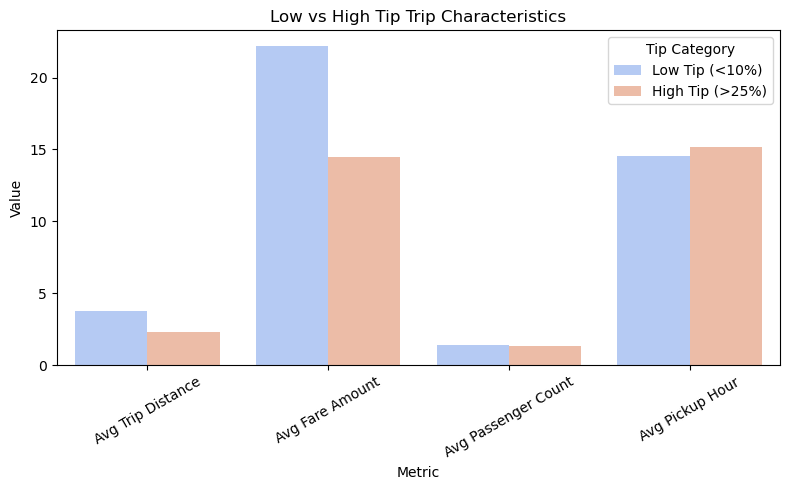

In [166]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
tip_comparison = pd.DataFrame({
    'Metric': ['Avg Trip Distance', 'Avg Fare Amount', 'Avg Passenger Count', 'Avg Pickup Hour'],
    'Low Tip (<10%)': [3.777414, 22.173265, 1.385763, 14.527785],
    'High Tip (>25%)': [2.325060, 14.489134, 1.347787, 15.196446]
})

# Melt for seaborn
tip_comparison_melted = tip_comparison.melt(id_vars='Metric', var_name='Tip Category', value_name='Value')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=tip_comparison_melted, x='Metric', y='Value', hue='Tip Category', palette='coolwarm')
plt.xticks(rotation=30)
plt.title('Low vs High Tip Trip Characteristics')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

                 avg_trip_distance  avg_fare_amount  avg_passenger_count  \
Low Tip (<10%)            3.777414        22.173265             1.385763   
High Tip (>25%)           2.325060        14.489134             1.347787   

                 avg_pickup_hour  \
Low Tip (<10%)         14.527785   
High Tip (>25%)        15.196446   

                                               vendor_distribution  
Low Tip (<10%)   {2: 0.7019030279974277, 1: 0.2975498854197803,...  
High Tip (>25%)       {2: 0.742444917979157, 1: 0.257555082020843}  


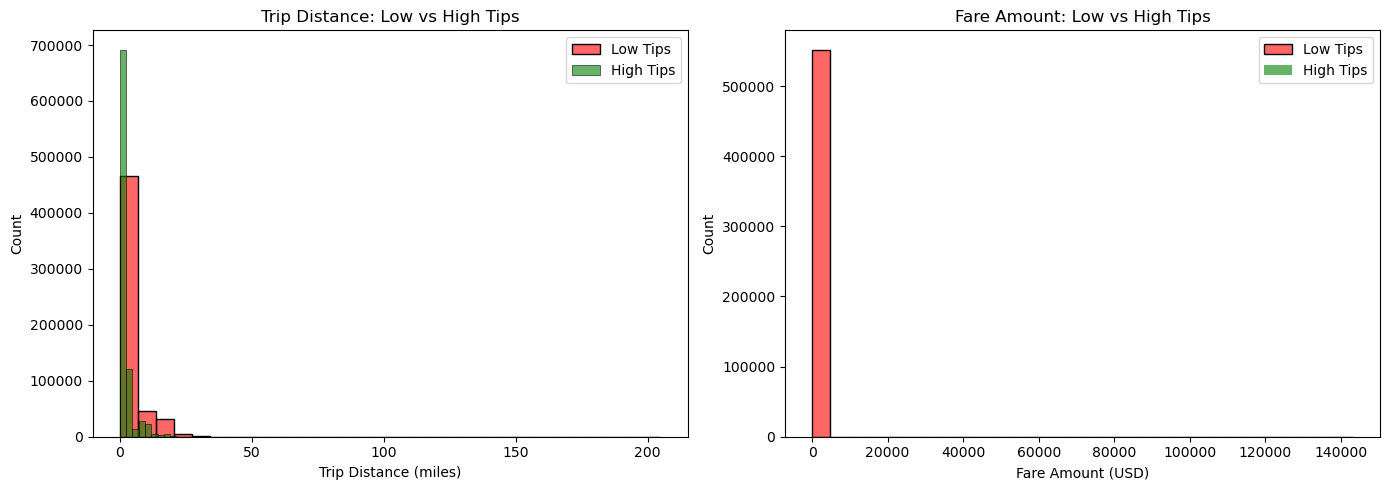

In [168]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
valid_df = df[df['fare_amount'] > 0].copy()

# Calculate tip percentage
valid_df['tip_percentage'] = (valid_df['tip_amount'] / valid_df['fare_amount']) * 100

# Create groups
low_tips = valid_df[valid_df['tip_percentage'] < 10]
high_tips = valid_df[valid_df['tip_percentage'] > 25]

# Summary statistics for comparison
comparison = {
    'avg_trip_distance': [low_tips['trip_distance'].mean(), high_tips['trip_distance'].mean()],
    'avg_fare_amount': [low_tips['fare_amount'].mean(), high_tips['fare_amount'].mean()],
    'avg_passenger_count': [low_tips['passenger_count'].mean(), high_tips['passenger_count'].mean()],
    'avg_pickup_hour': [low_tips['tpep_pickup_datetime'].dt.hour.mean(), high_tips['tpep_pickup_datetime'].dt.hour.mean()],
    'vendor_distribution': [
        low_tips['VendorID'].value_counts(normalize=True).to_dict(),
        high_tips['VendorID'].value_counts(normalize=True).to_dict()
    ]
}

comparison_df = pd.DataFrame(comparison, index=['Low Tip (<10%)', 'High Tip (>25%)'])
print(comparison_df)

# Optional: Visual comparison for trip distances and fares
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(low_tips['trip_distance'], bins=30, color='red', alpha=0.6, label='Low Tips', ax=axes[0])
sns.histplot(high_tips['trip_distance'], bins=30, color='green', alpha=0.6, label='High Tips', ax=axes[0])
axes[0].set_title('Trip Distance: Low vs High Tips')
axes[0].set_xlabel('Trip Distance (miles)')
axes[0].legend()

sns.histplot(low_tips['fare_amount'], bins=30, color='red', alpha=0.6, label='Low Tips', ax=axes[1])
sns.histplot(high_tips['fare_amount'], bins=30, color='green', alpha=0.6, label='High Tips', ax=axes[1])
axes[1].set_title('Fare Amount: Low vs High Tips')
axes[1].set_xlabel('Fare Amount (USD)')
axes[1].legend()

plt.tight_layout()
plt.show()

**3.2.14**
Analyse the variation of passenger count across hours and days of the week.

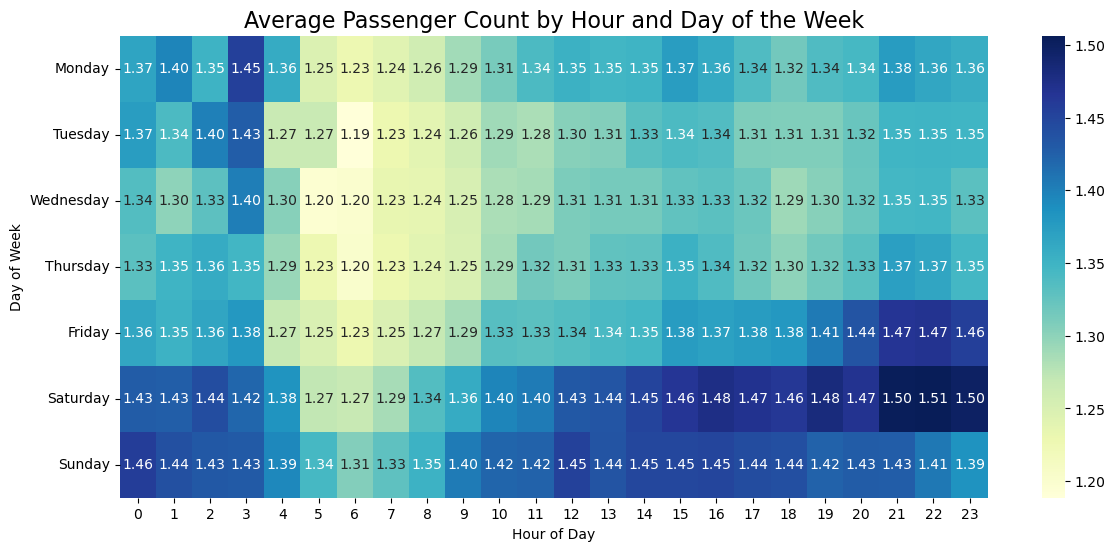

In [170]:
# See how passenger count varies across hours and days
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour

# Calculate average passenger count
passenger_trends = (
    df.groupby(['day_of_week', 'hour_of_day'])['passenger_count']
      .mean()
      .reset_index()
)

# Ensure days are in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_trends['day_of_week'] = pd.Categorical(passenger_trends['day_of_week'], categories=days_order, ordered=True)

# Pivot table for heatmap
passenger_pivot = passenger_trends.pivot(index='day_of_week', columns='hour_of_day', values='passenger_count')

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(passenger_pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average Passenger Count by Hour and Day of the Week", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

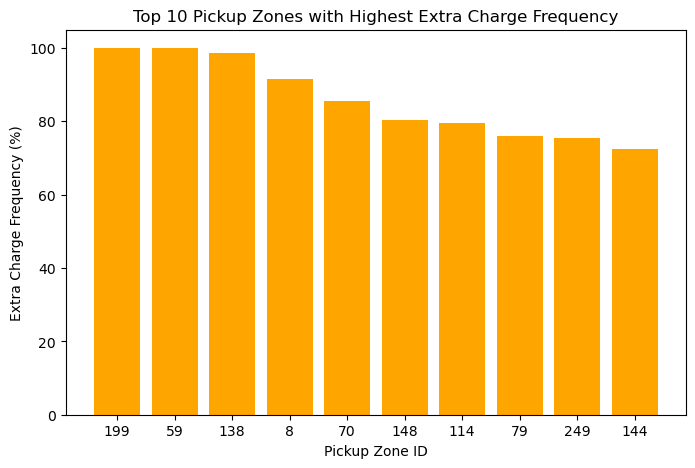

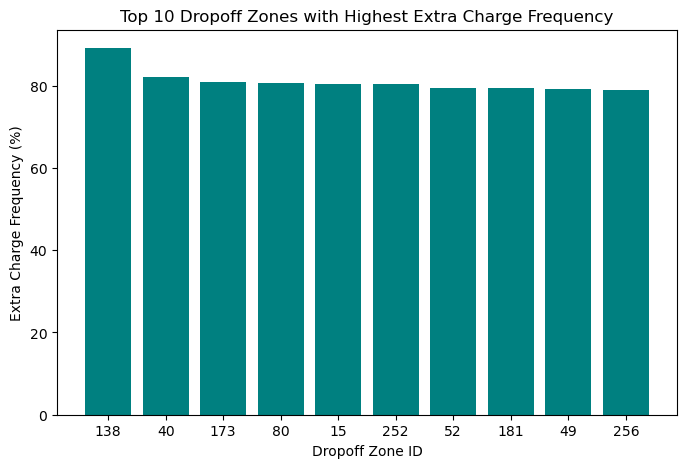

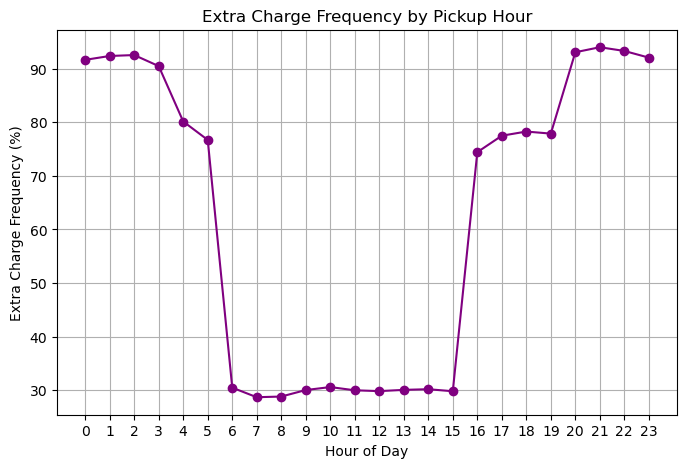

In [270]:
df['extra_applied'] = df['extra'] > 0

# -------------------------
# 1️⃣ Pickup Zones with High Extra Charges
# -------------------------
pickup_extra = (
    df.groupby('PULocationID')['extra_applied']
    .mean()
    .reset_index()
    .sort_values(by='extra_applied', ascending=False)
    .head(10)
)
pickup_extra['extra_applied'] *= 100  # convert to %

plt.figure(figsize=(8,5))
plt.bar(pickup_extra['PULocationID'].astype(str), pickup_extra['extra_applied'], color='orange')
plt.ylabel('Extra Charge Frequency (%)')
plt.xlabel('Pickup Zone ID')
plt.title('Top 10 Pickup Zones with Highest Extra Charge Frequency')
plt.show()

# -------------------------
# 2️⃣ Dropoff Zones with High Extra Charges
# -------------------------
dropoff_extra = (
    df.groupby('DOLocationID')['extra_applied']
    .mean()
    .reset_index()
    .sort_values(by='extra_applied', ascending=False)
    .head(10)
)
dropoff_extra['extra_applied'] *= 100  # convert to %

plt.figure(figsize=(8,5))
plt.bar(dropoff_extra['DOLocationID'].astype(str), dropoff_extra['extra_applied'], color='teal')
plt.ylabel('Extra Charge Frequency (%)')
plt.xlabel('Dropoff Zone ID')
plt.title('Top 10 Dropoff Zones with Highest Extra Charge Frequency')
plt.show()

# -------------------------
# 3️⃣ Time of Day Analysis
# -------------------------
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_extra = (
    df.groupby('pickup_hour')['extra_applied']
    .mean()
    .reset_index()
)
hourly_extra['extra_applied'] *= 100

plt.figure(figsize=(8,5))
plt.plot(hourly_extra['pickup_hour'], hourly_extra['extra_applied'], marker='o', color='purple')
plt.xticks(range(0, 24))
plt.ylabel('Extra Charge Frequency (%)')
plt.xlabel('Hour of Day')
plt.title('Extra Charge Frequency by Pickup Hour')
plt.grid(True)
plt.show()

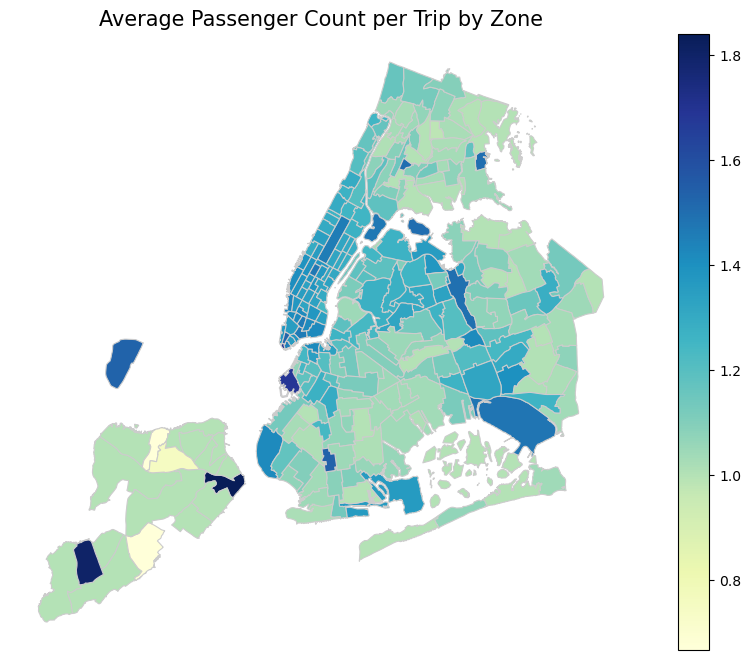

In [265]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
passenger_summary = df.groupby('PULocationID').agg(
    total_passenger_count=('passenger_count', 'sum'),
    num_trips=('passenger_count', 'count')
).reset_index()

# Step 2: Calculate average passenger count per trip for each zone
passenger_summary['avg_passenger_count'] = (
    passenger_summary['total_passenger_count'] / passenger_summary['num_trips']
)

# Step 3: Merge with zones GeoDataFrame
zones_with_trips = zones.merge(
    passenger_summary,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

# Step 4: Plot average passenger count by zone
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_with_trips.plot(
    column='avg_passenger_count',
    cmap='YlGnBu',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title("Average Passenger Count per Trip by Zone", fontdict={'fontsize': 15})
ax.axis('off')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

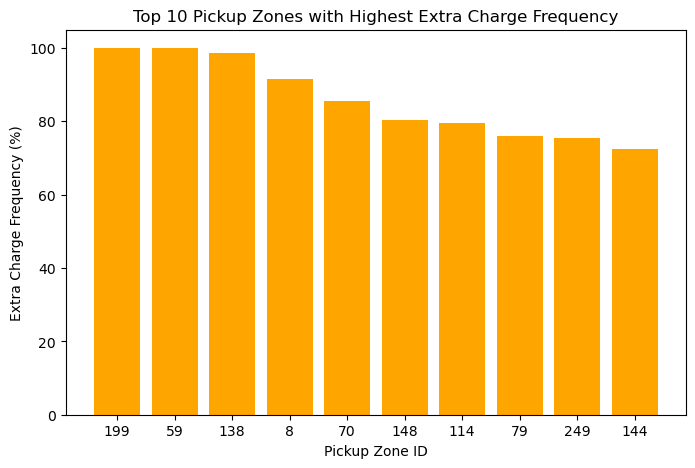

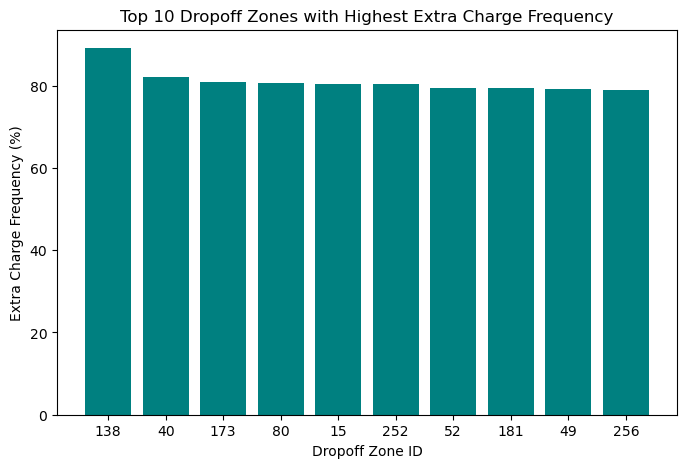

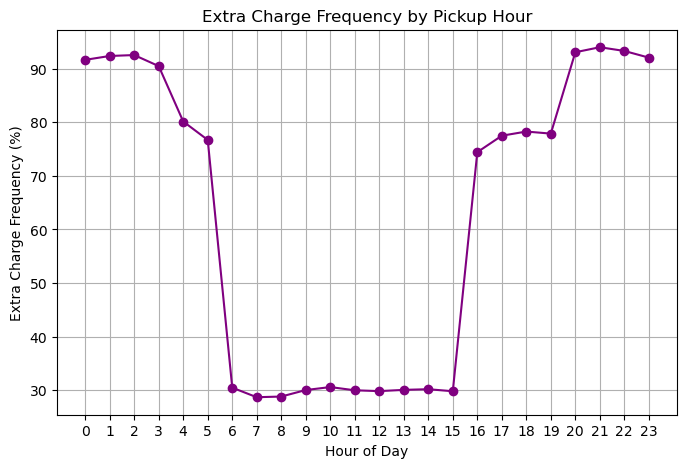

In [272]:
# How often is each surcharge applied?
df['extra_applied'] = df['extra'] > 0

# -------------------------
# 1️⃣ Pickup Zones with High Extra Charges
# -------------------------
pickup_extra = (
    df.groupby('PULocationID')['extra_applied']
    .mean()
    .reset_index()
    .sort_values(by='extra_applied', ascending=False)
    .head(10)
)
pickup_extra['extra_applied'] *= 100  # convert to %

plt.figure(figsize=(8,5))
plt.bar(pickup_extra['PULocationID'].astype(str), pickup_extra['extra_applied'], color='orange')
plt.ylabel('Extra Charge Frequency (%)')
plt.xlabel('Pickup Zone ID')
plt.title('Top 10 Pickup Zones with Highest Extra Charge Frequency')
plt.show()

# -------------------------
# 2️⃣ Dropoff Zones with High Extra Charges
# -------------------------
dropoff_extra = (
    df.groupby('DOLocationID')['extra_applied']
    .mean()
    .reset_index()
    .sort_values(by='extra_applied', ascending=False)
    .head(10)
)
dropoff_extra['extra_applied'] *= 100  # convert to %

plt.figure(figsize=(8,5))
plt.bar(dropoff_extra['DOLocationID'].astype(str), dropoff_extra['extra_applied'], color='teal')
plt.ylabel('Extra Charge Frequency (%)')
plt.xlabel('Dropoff Zone ID')
plt.title('Top 10 Dropoff Zones with Highest Extra Charge Frequency')
plt.show()

# -------------------------
# 3️⃣ Time of Day Analysis
# -------------------------
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_extra = (
    df.groupby('pickup_hour')['extra_applied']
    .mean()
    .reset_index()
)
hourly_extra['extra_applied'] *= 100

plt.figure(figsize=(8,5))
plt.plot(hourly_extra['pickup_hour'], hourly_extra['extra_applied'], marker='o', color='purple')
plt.xticks(range(0, 24))
plt.ylabel('Extra Charge Frequency (%)')
plt.xlabel('Hour of Day')
plt.title('Extra Charge Frequency by Pickup Hour')
plt.grid(True)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Zone-Based Allocation: Position more taxis in high-demand zones (downtown, airports, nightlife) during peak hours.
Time-Aware Scheduling: Increase driver availability during morning/evening rush hours and late-night high-fare periods.
Dynamic Dispatching: Use real-time traffic and demand data to route vehicles efficiently and reduce idle time.
Vehicle Assignment: Deploy larger-capacity vehicles in zones/times with higher passenger counts.
Surge Pricing & Incentives: Apply dynamic pricing and driver incentives in high-demand or underserved areas.
Minimize Inefficiencies: Plan routes to avoid congestion and extra charges.
Continuous Monitoring: Track pickups, dropoffs, and fares to adjust dispatch strategies in real time.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
High-Demand Zones: Place more cabs in downtown, airport, and entertainment districts during peak hours.
Time-Based Positioning: Increase availability during morning/evening rush hours and late-night/early-morning high-fare periods.
Weekend vs Weekday Strategy: Allocate more vehicles to nightlife and tourist zones on weekends; focus on business districts during weekdays.
Seasonal Adjustments: Adjust cab distribution based on monthly or seasonal demand patterns (e.g., holidays, events).
Nighttime Coverage: Ensure sufficient cabs in nightlife-heavy and airport areas during 11 PM–5 AM hours.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Distance-Based Tiers: Maintain higher fare per mile for short trips (<2 miles), moderate rates for mid-range (2–5 miles), and competitive rates for long trips (>5 miles).
Time-of-Day Pricing: Apply slight premiums during late-night and early-morning high-demand periods.
Zone-Based Pricing: Adjust fares in high-demand or congestion-heavy zones to reflect operational costs.
Dynamic Pricing: Use real-time demand and supply data to optimize rates while staying competitive.
Incentivize Tips: Encourage service quality and small perks to increase tip revenue without raising base fares.